# Perfil comercial de um país

Perfil comercial de um país. O objetivo é analisar as trocas comerciais de um país com o resto do mundo.

Mais informação em [country_trade_profile_README.md](country_trade_profile_README.md)

## Setup

For instructions and how to obtain an API key, see [here](0-comtrade-setup-first.ipynb).

In [1]:
import logging
import sys

# Configure logging to output to stdout and set level to DEBUG
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

# Example info message
logging.info("This is an info message")
# Example debug message
logging.debug("This is a debug message")

INFO:root:This is an info message


In [2]:
import comtradetools as comtradetools

comtradetools.setup()
APIKEY = comtradetools.get_api_key()
comtradetools.init(APIKEY, force_init=False)


INFO:root:Loading HS codes from support/harmonized-system.csv


In [3]:
import pandas as pd

pd.options.display.float_format = '{:,.2f}'.format

## Country and period of interest

Choose country and years of interest

In [4]:
import comtradetools


country_of_interest_name = 'Equatorial Guinea'
country_of_interest = comtradetools.encode_country(country_of_interest_name)

years_of_interest=comtradetools.year_range(2003,2023)
print(country_of_interest_name, country_of_interest, years_of_interest)

Equatorial Guinea 226 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023


In [5]:
from datetime import datetime

current_datetime = datetime.now()
print(f"Start run for {country_of_interest_name}:", current_datetime)

Start run for Equatorial Guinea: 2024-06-21 20:09:30.061660


## 1.Trade balance

### 1a Trade balance symmetric values

In [6]:
import comtradetools
import pandas as pd
import numpy as np

pd.options.display.float_format = '{:,.2f}'.format

global_trade = comtradetools.get_trade_flows(country_of_interest,
                                        period=years_of_interest,
                                        period_size=1,  # how may years fetched in one call
                                        retry_if_empty=False,
                                        symmetric_values=True)

cols_of_interest = global_trade.columns



INFO:root:Calling getFinalData for period 2003
INFO:root:Calling getFinalData for period 2004
INFO:root:Calling getFinalData for period 2005
INFO:root:Calling getFinalData for period 2006
INFO:root:Calling getFinalData for period 2007
INFO:root:Calling getFinalData for period 2008
INFO:root:Calling getFinalData for period 2009
INFO:root:Calling getFinalData for period 2010
INFO:root:Calling getFinalData for period 2011
INFO:root:Calling getFinalData for period 2012
INFO:root:Calling getFinalData for period 2013
INFO:root:Calling getFinalData for period 2014
INFO:root:Calling getFinalData for period 2015
INFO:root:Calling getFinalData for period 2016
INFO:root:Calling getFinalData for period 2017
INFO:root:Calling getFinalData for period 2018
INFO:root:Calling getFinalData for period 2019
INFO:root:Calling getFinalData for period 2020
INFO:root:Calling getFinalData for period 2021
INFO:root:Calling getFinalData for period 2022
INFO:root:Calling getFinalData for period 2023
INFO:root:Cal

/Users/jrc/develop/cipf-comtrade/comtradetools.py:658: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, temp], ignore_index=True)
/Users/jrc/develop/cipf-comtrade/comtradetools.py:1227: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  global_trade = pd.concat([global_trade, exports_from_imports, imports_from_exports])


In [7]:
global_trade['varM_perc']=global_trade['M<X']/global_trade['M<X']
global_trade['varX_perc']=global_trade['X<M']/global_trade['X<M']
print(f"M = Imports as reported by {country_of_interest_name}")
print(f"X = Exports as reported by {country_of_interest_name}")
print(f"X<M = Exports as reported by rest of the world imports from {country_of_interest_name}")
print(f"M<X = Imports as reported by rest of the world exports to {country_of_interest_name}")
global_trade


M = Imports as reported by Equatorial Guinea
X = Exports as reported by Equatorial Guinea
X<M = Exports as reported by rest of the world imports from Equatorial Guinea
M<X = Imports as reported by rest of the world exports to Equatorial Guinea


flowCode,M<X,X<M,trade_balance (X<M-M<X),trade_volume (X<M+M<X),varM_perc,varX_perc
period,,,,,,
2003,"1,078,629,613.36","2,742,819,503.01","1,664,189,889.65","3,821,449,116.37",1.00,1.00
2004,"700,056,876.30","4,291,635,620.68","3,591,578,744.38","4,991,692,496.98",1.00,1.00
2005,"1,035,248,466.62","6,628,318,107.32","5,593,069,640.70","7,663,566,573.95",1.00,1.00
2006,"1,498,577,121.10","8,444,959,810.83","6,946,382,689.74","9,943,536,931.93",1.00,1.00
2007,"1,428,472,645.27","9,475,040,661.89","8,046,568,016.61","10,903,513,307.16",1.00,1.00
2008,"1,717,449,643.66","16,064,218,733.06","14,346,769,089.40","17,781,668,376.72",1.00,1.00
2009,"5,317,687,746.91","9,189,028,053.71","3,871,340,306.80","14,506,715,800.61",1.00,1.00
2010,"5,116,075,559.27","9,609,962,928.26","4,493,887,368.99","14,726,038,487.53",1.00,1.00
2011,"3,426,974,681.31","13,317,787,216.19","9,890,812,534.89","16,744,761,897.50",1.00,1.00


Save to Excel file

In [8]:
start_year=global_trade.index.min()
end_year=global_trade.index.max()
excel_file = f"reports/{country_of_interest_name}_1.1_trade_balance_{start_year}-{end_year}.xlsx"
global_trade.to_excel(excel_file)
print("Trade ballance report saved to ", excel_file)

Trade ballance report saved to  reports/Equatorial Guinea_1.1_trade_balance_2003-2023.xlsx


### Trade balance graph

Plot saved to  reports/Equatorial Guinea_1.2_trade_balance_2003-2023.png
0 Line2D(M<X) 0.0
1 Line2D(X<M) 0.8
2 Line2D(trade_balance (X<M-M<X)) 0.0
3 Line2D(trade_volume (X<M+M<X)) 0.8


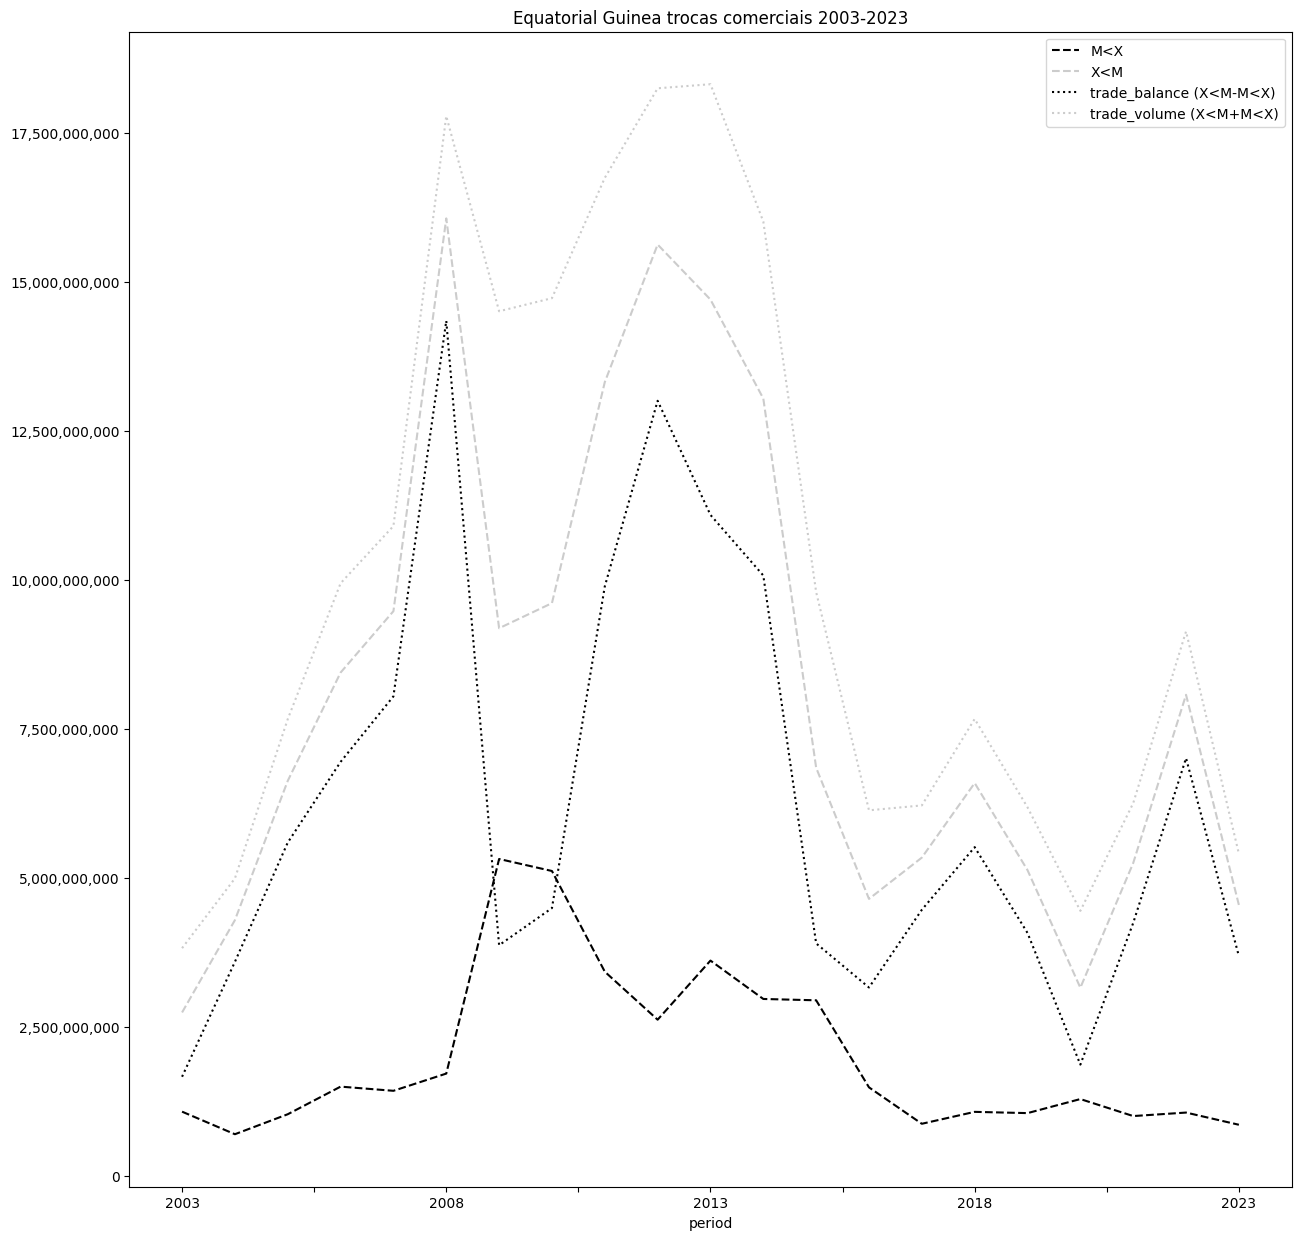

In [9]:
import logging

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
logging.basicConfig(level=logging.ERROR)

plotfile = f"reports/{country_of_interest_name}_1.2_trade_balance_{start_year}-{end_year}.png"

start_year=global_trade.index.min()
end_year=global_trade.index.max()
title=f"{country_of_interest_name} trocas comerciais {start_year}-{end_year}"
print("Plot saved to ", plotfile)
fig = global_trade[cols_of_interest].plot.line(figsize=(15,15),title=title)

# use a grayscale palette of colors
colors = ['0.0','0.8','0.0','0.8','0.0','0.8','0.0','0.8']

# use different line styles and black lines
linestyles = ['dashed', 'dashed', 'dotted', 'dotted', 'dashdot', 'dashdot', 'solid', 'solid']
for i, line in enumerate(fig.get_lines()):
    print(i, line, colors[i])
    line.set_color(colors[i])
    line.set_linestyle(linestyles[i % len(linestyles)])

formatter = ticker.StrMethodFormatter('{x:,.0f}')
fig.yaxis.set_major_formatter(formatter)
fig.legend(list(global_trade.columns.astype(str)))

plt.savefig(plotfile)
plt.show()

## 2. Exports


### 2.1 Main export partners/clients

Colect destinations of exports of the country. 

Use either reported exports
of country of interest, or reported imports from country of interest by
all other countries (symmetric reporting). 

Set variable `symmetric_reporting` to choose.

In [10]:
# If symmetric_reporting is "True" we get the exports from
#    the reported imports of all the countries
# i.e. instead of asking Country of Interest for export data we ask the world
#    for import data from Country of Interest

symmetric_reporting = True  # set to false to use reported exports by Country of Interest

if symmetric_reporting:
    reporterCode = None
    partnerCode = country_of_interest
    flowCode = 'M'
    reporter_column = 'partner'
    partner_column = 'reporter'
    filename_symmetric_flag="reverse"
else:
    reporterCode = country_of_interest
    partnerCode = None
    flowCode = 'X'
    reporter_column = 'reporter'
    partner_column = 'partner'
    filename_symmetric_flag="direct"

In [11]:

df = comtradetools.getFinalData(APIKEY,
                                reporterCode=reporterCode,
                                typeCode='C',  # commodities
                                freqCode='A',  # annual
                                flowCode=flowCode,
                                period=years_of_interest,
                                period_size=1,
                                partnerCode=partnerCode,
                                remove_world=True,
                                partner2Code=0,  # world
                                clCode="HS",
                                cmdCode="TOTAL",
                                motCode=0,  # all means of transport
                                customsCode='C00', # all customs
                                includeDesc=True,
                                retry_if_empty=False,
                                cache=True
                                )

INFO:root:Calling getFinalData for period 2003
INFO:root:Calling getFinalData for period 2004
INFO:root:Calling getFinalData for period 2005
INFO:root:Calling getFinalData for period 2006
INFO:root:Calling getFinalData for period 2007
INFO:root:Calling getFinalData for period 2008
INFO:root:Calling getFinalData for period 2009
INFO:root:Calling getFinalData for period 2010
INFO:root:Calling getFinalData for period 2011
INFO:root:Calling getFinalData for period 2012
INFO:root:Calling getFinalData for period 2013
INFO:root:Calling getFinalData for period 2014
INFO:root:Calling getFinalData for period 2015
INFO:root:Calling getFinalData for period 2016
INFO:root:Calling getFinalData for period 2017
INFO:root:Calling getFinalData for period 2018
INFO:root:Calling getFinalData for period 2019
INFO:root:Calling getFinalData for period 2020
INFO:root:Calling getFinalData for period 2021
INFO:root:Calling getFinalData for period 2022
INFO:root:Calling getFinalData for period 2023


Compute percentage of trade and rank of partners for each year.

Use `show_only_top` to show only the top partners (e.g. 5).

In [12]:
import pandas as pd
import comtradetools
# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5

# aggregate by year, flow, reporter
exports = comtradetools.total_rank_perc(df,groupby=['refYear','flowCode',f'{partner_column}Desc'],
                                    col='primaryValue',
                                    prefix='partner',
                                    drop_duplicates=True)

cols=['refYear','flowCode',f'{reporter_column}Desc','partner_rank',f'{partner_column}Desc','cmdCode','partner_sum','partner_perc','partner_upper_sum']

formats =  comtradetools.make_format(cols)

top_export_partners = exports[exports['partner_rank']<=show_only_top][f'{partner_column}Desc'].unique()
top_export_partners_codes = exports[exports['partner_rank']<=show_only_top][f'{partner_column}Code'].unique()

print(f"Top {show_only_top} export partners of {country_of_interest_name} in {years_of_interest}: \n{top_export_partners}")
exports[exports['partner_rank']<=show_only_top][cols].sort_values(['refYear','flowCode','partner_rank',f'{partner_column}Desc','cmdCode']).style.format(formats)

Top 5 export partners of Equatorial Guinea in 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023: 
['Canada' 'China' 'Italy' 'Spain' 'USA' 'Other Asia, nes' 'Portugal'
 'France' 'Japan' 'Rep. of Korea' 'United Kingdom' 'Brazil' 'Singapore'
 'India' 'Netherlands' 'Chile' 'Germany']


,refYear,flowCode,partnerDesc,partner_rank,reporterDesc,cmdCode,partner_sum,partner_perc,partner_upper_sum
52,2003,M,Equatorial Guinea,1,USA,TOTAL,"$962,963,237",35.109%,"$2,742,819,503"
45,2003,M,Equatorial Guinea,2,Spain,TOTAL,"$732,503,990",26.706%,"$2,742,819,503"
9,2003,M,Equatorial Guinea,3,China,TOTAL,"$411,886,532",15.017%,"$2,742,819,503"
8,2003,M,Equatorial Guinea,4,Canada,TOTAL,"$329,285,725",12.005%,"$2,742,819,503"
20,2003,M,Equatorial Guinea,5,Italy,TOTAL,"$183,796,347",6.701%,"$2,742,819,503"
110,2004,M,Equatorial Guinea,1,USA,TOTAL,"$1,258,840,198",29.332%,"$4,291,635,621"
64,2004,M,Equatorial Guinea,2,China,TOTAL,"$996,649,809",23.223%,"$4,291,635,621"
101,2004,M,Equatorial Guinea,3,Spain,TOTAL,"$684,463,902",15.949%,"$4,291,635,621"
85,2004,M,Equatorial Guinea,4,"Other Asia, nes",TOTAL,"$638,433,406",14.876%,"$4,291,635,621"
63,2004,M,Equatorial Guinea,5,Canada,TOTAL,"$262,303,391",6.112%,"$4,291,635,621"


Pivot the countries to columns, keeping the total value and percentage in separate columns.

----

Passamos os países para colunas, mantendo a percentagem e o valor em separado.

In [13]:
pivoted = df.pivot_table(index=['refYear','flowDesc'], columns=f'{partner_column}Desc', values=['primaryValue','partner_perc'])
pivoted.swaplevel(axis=1).fillna(0,inplace=True)
pivoted.sort_index(axis=1, level=0, inplace=True)


Limit table to top_export_partners

Note that the number of top partners considered was set before with `show_only_top` (e.g. 5).

But each year the top partners may vary, so that the total number of partners for the period will be
more than `show_only_top`.

In [14]:
show_only_columns = [(l1, country) for l1,country in pivoted.columns.tolist() if country in top_export_partners]
pivoted[show_only_columns].fillna(0)

partner_perc                                                \
reporterDesc           Brazil Canada Chile China France Germany India Italy   
refYear flowDesc                                                              
2003    Import           0.00   0.12  0.00  0.15   0.01    0.00  0.00  0.07   
2004    Import           0.00   0.06  0.00  0.23   0.01    0.00  0.00  0.04   
2005    Import           0.04   0.07  0.00  0.22   0.03    0.01  0.00  0.04   
2006    Import           0.01   0.02  0.00  0.30   0.02    0.01  0.00  0.02   
2007    Import           0.02   0.02  0.00  0.18   0.07    0.01  0.01  0.02   
2008    Import           0.02   0.00  0.00  0.14   0.07    0.01  0.01  0.06   
2009    Import           0.03   0.03  0.02  0.11   0.04    0.00  0.02  0.05   
2010    Import           0.05   0.07  0.01  0.06   0.04    0.00  0.01  0.10   
2011    Import           0.05   0.05  0.00  0.13   0.05    0.00  0.00  0.10   
2012    Import           0.01   0.03  0.00  0.12   0.16    0.01  0.03  0.05   
2013    Import           0.07   0.00  0.00  0.17   0.10    0.01  0.03  0.00   
2014    Import           0.09   0.00  0.00  0.25   0.08    0.01  0.05  0.00   
2015    Import           0.08   0.00  0.01  0.17   0.06    0.01  0.06  0.04   
2016    Import           0.03   0.01  0.00  0.14   0.01    0.02  0.20  0.05   
2017    Import           0.01   0.01  0.00  0.28   0.03    0.02  0.11  0.03   
2018    Import           0.00   0.00  0.03  0.32   0.00    0.01  0.09  0.04   
2019    Import           0.01   0.00  0.01  0.34   0.00    0.02  0.19  0.01   
2020    Import           0.00   0.00  0.03  0.37   0.00    0.01  0.11  0.02   
2021    Import           0.00   0.00  0.02  0.23   0.02    0.01  0.16  0.02   
2022    Import           0.00   0.01  0.06  0.19   0.02    0.05  0.11  0.07   
2023    Import           0.00   0.00  0.03  0.30   0.04    0.07  0.04  0.08   

                                    ...     primaryValue                   \
reporterDesc     Japan Netherlands  ...            Italy            Japan   
refYear flowDesc                    ...                                     
2003    Import    0.00        0.00  ...   183,796,346.53        19,363.00   
2004    Import    0.01        0.01  ...   165,596,052.01    47,263,819.00   
2005    Import    0.03        0.04  ...   239,576,315.89   224,581,255.00   
2006    Import    0.04        0.02  ...   193,659,085.93   321,151,074.00   
2007    Import    0.06        0.03  ...   173,281,629.38   585,025,176.00   
2008    Import    0.07        0.02  ...   915,406,643.87 1,135,283,519.00   
2009    Import    0.09        0.03  ...   454,127,503.76   781,212,427.00   
2010    Import    0.04        0.06  ...   963,727,004.00   359,387,195.00   
2011    Import    0.10        0.07  ... 1,397,408,474.00 1,322,915,177.00   
2012    Import    0.19        0.07  ...   797,772,738.00 2,900,863,120.00   
2013    Import    0.14        0.04  ...    19,604,853.00 2,013,085,033.00   
2014    Import    0.07        0.05  ...     1,291,250.00   854,438,831.00   
2015    Import    0.03        0.05  ...   270,943,911.38   208,351,100.00   
2016    Import    0.03        0.04  ...   238,948,667.29   127,048,165.00   
2017    Import    0.03        0.03  ...   143,366,353.56   146,950,593.32   
2018    Import    0.01        0.03  ...   255,582,688.25    48,856,465.04   
2019    Import    0.01        0.02  ...    57,500,693.40    33,458,025.95   
2020    Import    0.00        0.03  ...    58,365,523.43        48,781.20   
2021    Import    0.03        0.06  ...   121,831,731.59   161,344,110.59   
2022    Import    0.01        0.05  ...   581,038,275.32   109,395,451.75   
2023    Import    0.04        0.14  ...   371,526,133.90   164,638,778.06   

                                                                   \
reporterDesc          Netherlands  Other Asia, nes       Portugal   
refYear flowDesc                                                    
2003    Import       6,510,222.00    53,252,000.00   3,848,745.0

Make a table with the total value of exports for top partners in the period of interest

In [15]:
print("Top partners for exports: ",top_export_partners)
print("Period of interest:",years_of_interest)

Top partners for exports:  ['Canada' 'China' 'Italy' 'Spain' 'USA' 'Other Asia, nes' 'Portugal'
 'France' 'Japan' 'Rep. of Korea' 'United Kingdom' 'Brazil' 'Singapore'
 'India' 'Netherlands' 'Chile' 'Germany']
Period of interest: 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023


In [16]:
import pandas as pd

# lets get just the value of imports from the top export partners
values_only = pivoted.loc[:,"primaryValue"]
values_only.reset_index(level=1, drop=True, inplace=True)
show_only_columns = [country for country in values_only.columns.tolist() if country in top_export_partners]
values_only=values_only[show_only_columns]
# sort columns by mean value
mean_values = values_only.mean().sort_values(ascending=False)
values_only = values_only[mean_values.index]
values_only

reporterDesc,China,USA,Spain,Japan,France,Rep. of Korea,"Other Asia, nes",India,Netherlands,Italy,Portugal,Brazil,United Kingdom,Singapore,Canada,Chile,Germany
refYear,,,,,,,,,,,,,,,,,
2003,"411,886,532.00","962,963,237.00","732,503,989.87","19,363.00","24,682,318.00","3,956.00","53,252,000.00","169,121.00","6,510,222.00","183,796,346.53","3,848,745.00",10.00,"8,018,515.00",NaN,"329,285,725.00",NaN,"3,849,000.00"
2004,"996,649,809.00","1,258,840,198.00","684,463,901.82","47,263,819.00","62,236,774.00","30,598,339.00","638,433,406.00","808,663.00","42,874,249.00","165,596,052.01","3,576,426.00","14,028,598.00","24,050,360.00",NaN,"262,303,391.00",NaN,"8,365,000.00"
2005,"1,437,833,974.00","1,674,639,277.00","739,154,900.62","224,581,255.00","217,389,419.00",NaN,"488,952,507.00","17,704.00","288,854,272.00","239,576,315.89","373,311,610.00","298,218,197.00","23,456,434.00",NaN,"451,842,247.00",NaN,"36,369,000.00"
2006,"2,537,591,664.00","1,825,405,066.00","1,043,827,971.35","321,151,074.00","187,369,162.00",9.00,"870,282,551.00","158,462.00","147,332,389.00","193,659,085.93","500,511,777.00","97,273,246.00","28,644,836.00",NaN,"207,846,937.00",NaN,"98,230,000.00"
2007,"1,697,283,346.00","1,861,818,069.00","1,239,329,788.26","585,025,176.00","667,697,829.00",NaN,"1,213,949,227.00","72,732,621.00","293,051,454.00","173,281,629.38","585,255,809.00","216,506,509.00","20,805,400.00",NaN,"217,630,055.00",NaN,"132,826,000.00"
2008,"2,267,871,882.00","3,495,118,929.00","2,787,809,301.27","1,135,283,519.00","1,202,111,534.00","834,696,104.00","1,637,194,382.00","83,307,525.00","390,316,326.00","915,406,643.87","406,637,544.00","376,794,866.00","1,264,555.00",NaN,"76,409,060.00",NaN,"154,791,547.89"
2009,"1,055,071,473.00","2,587,063,732.00","639,043,053.42","781,212,427.00","337,526,111.00","700,626,839.00","485,946,350.00","141,392,472.00","288,143,158.00","454,127,503.76","222,315,440.00","267,884,826.00","65,726,238.00",NaN,"305,927,152.00","156,894,904.87","5,043,412.56"
2010,"598,657,025.00","2,289,204,623.00","956,799,737.46","359,387,195.00","371,843,873.00","755,291,313.00","460,455,130.00","126,078,542.00","580,649,665.00","963,727,004.00","236,207,249.00","522,413,264.00","16,618,590.00",NaN,"651,844,115.00","72,237,717.06","5,062,041.39"
2011,"1,672,947,440.00","1,223,537,879.00","1,896,042,913.91","1,322,915,177.00","600,701,074.00","531,711,211.00","801,101,803.00","722,099.00","986,137,857.01","1,397,408,474.00","193,529,863.00","601,257,938.00","508,173,478.00","529,885.85","635,804,409.00",NaN,"40,955,576.08"


Plot saved to  reports/Equatorial Guinea_2.1.4_export_2003-2023_reverse.png
0 Line2D(_child0) #555555
1 Line2D(_child2) #666666
2 Line2D(_child4) #777777
3 Line2D(_child6) #888888
4 Line2D(_child8) #999999
5 Line2D(_child10) #AAAAAA
6 Line2D(_child12) #BBBBBB
7 Line2D(_child14) #CCCCCC
8 Line2D(_child16) #555555
9 Line2D(_child18) #666666
10 Line2D(_child20) #777777
11 Line2D(_child22) #888888
12 Line2D(_child24) #999999
13 Line2D(_child26) #AAAAAA
14 Line2D(_child28) #BBBBBB
15 Line2D(_child30) #CCCCCC
16 Line2D(_child32) #555555


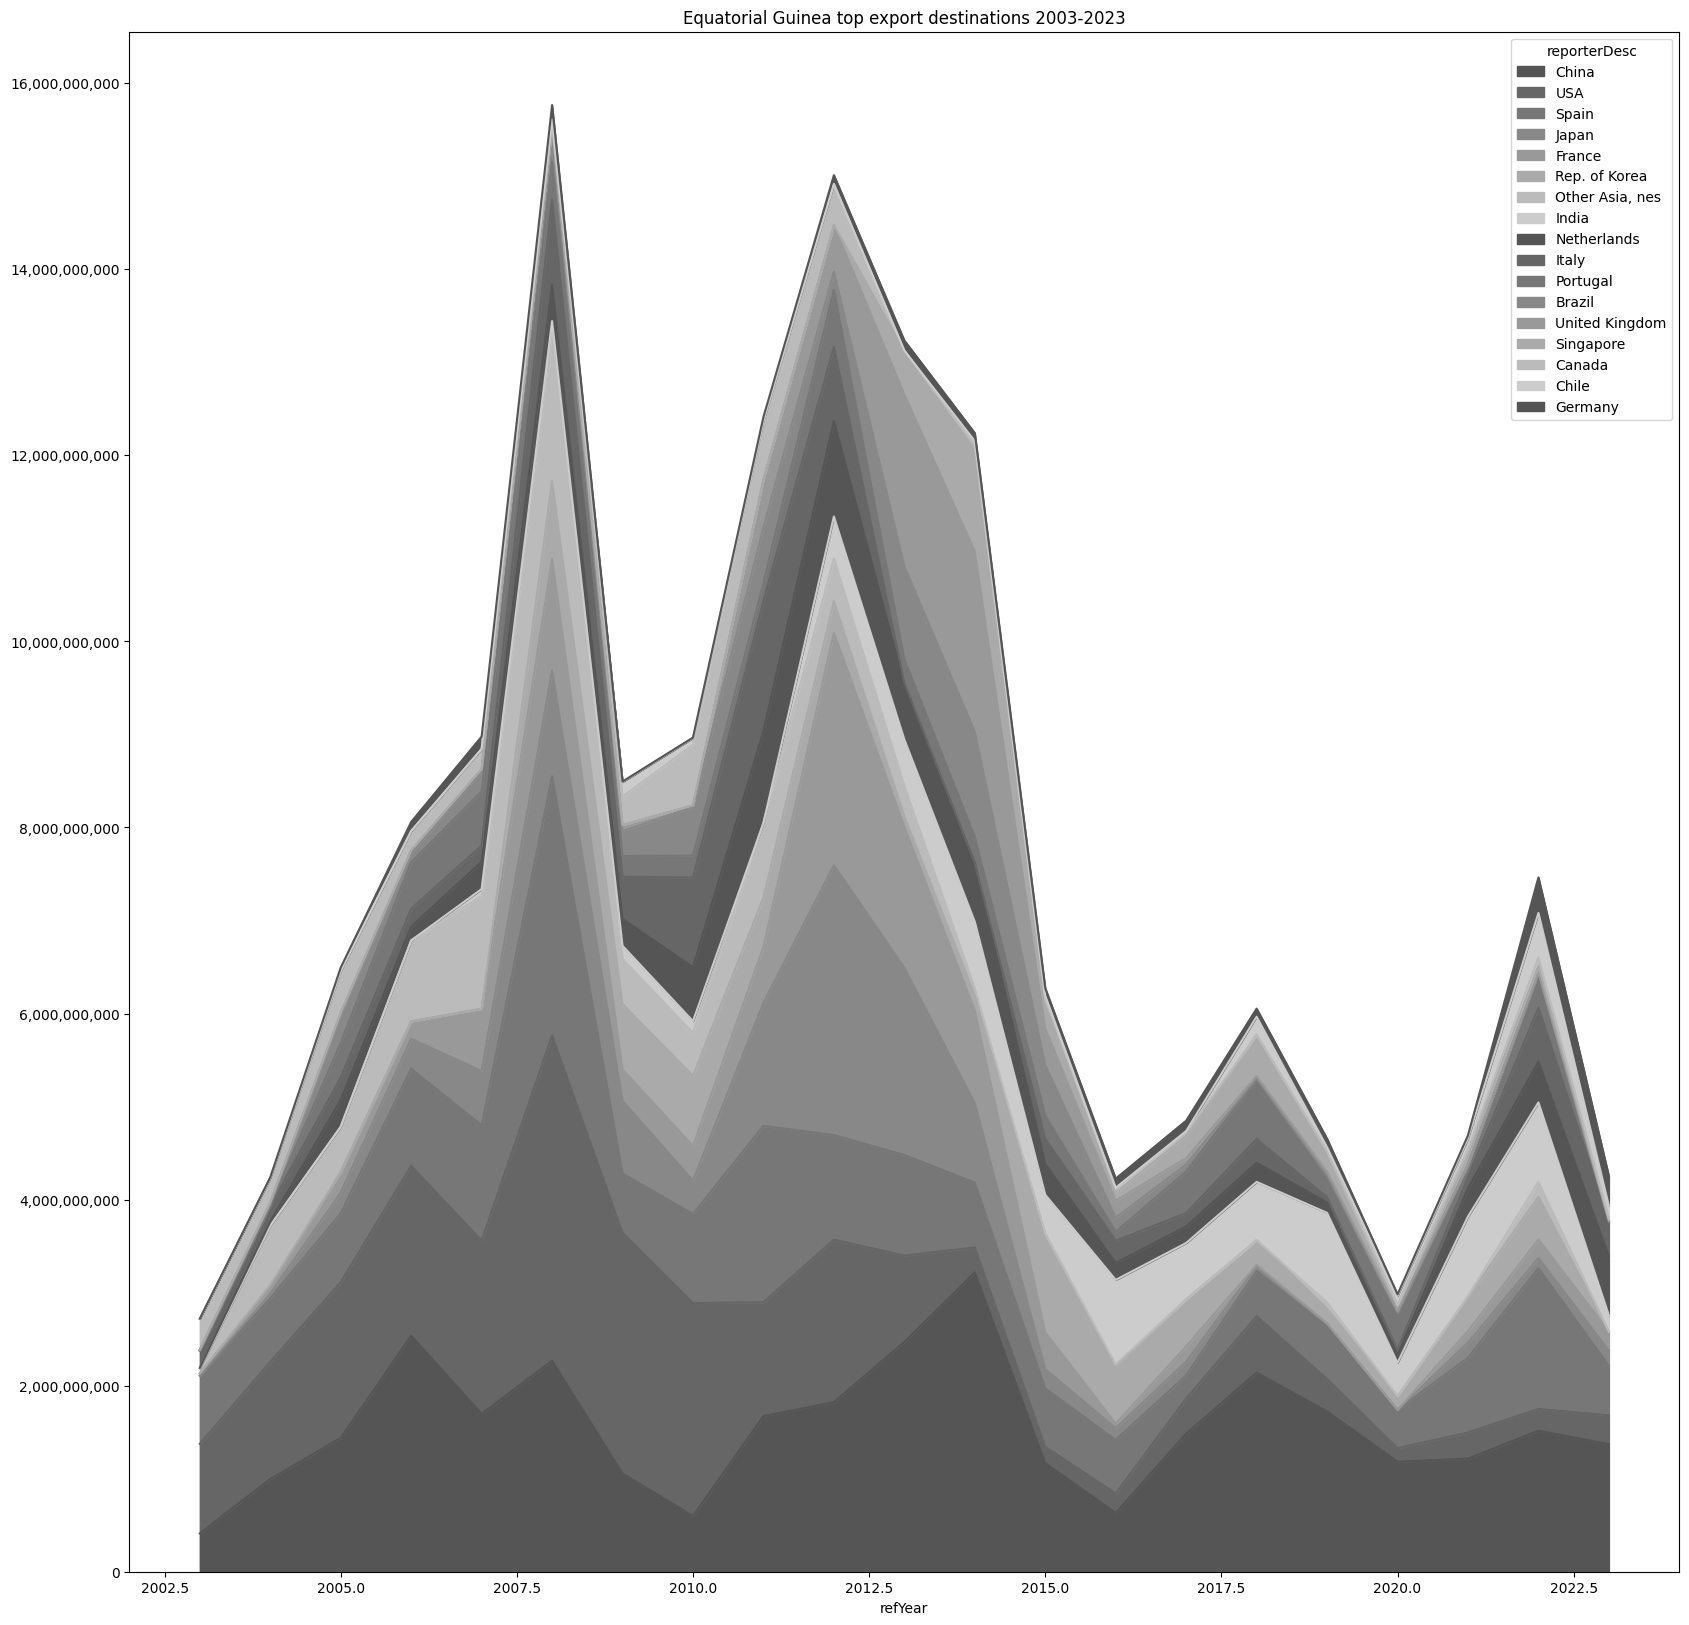

In [17]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plotfile = f"reports/{country_of_interest_name}_2.1.4_export_{start_year}-{end_year}_{filename_symmetric_flag}.png"
start_year=values_only.index.min()
end_year=values_only.index.max()
title=f"{country_of_interest_name} top export destinations {start_year}-{end_year}"
print("Plot saved to ", plotfile)
# see https://matplotlib.org/stable/gallery/color/named_colors.html
# colors = ['red','lightsalmon','green','lightgreen','darkviolet','violet','blue','dodgerblue','orange','yellow','brown','black','grey','pink','cyan','magenta',]
# colors = ['crimson', 'darkorange', 'gold', 'limegreen', 'mediumseagreen', 'teal', 'deepskyblue', 'royalblue', 'indigo', 'mediumvioletred', 'hotpink', 'saddlebrown', 'grey', 'black', 'darkslategrey', 'darkkhaki']
colors = [ '#555555', '#666666', '#777777', '#888888', '#999999', '#AAAAAA', '#BBBBBB', '#CCCCCC', ]

fig2 = values_only.plot.area(figsize=(20,20),title=title, color=colors)
for i, line in enumerate(fig2.get_lines()):
    n = i % len(colors)
    print(i, line, colors[n])
    line.set_color(colors[n])

formatter = ticker.StrMethodFormatter('{x:,.0f}')
fig2.yaxis.set_major_formatter(formatter)

plt.savefig(plotfile)
plt.show()

#### Export to Excel

Table with the top export destinations for the period of interest

In [18]:
show_only_columns = [(l1, country) for l1,country in pivoted.columns.tolist() if country in top_export_partners]

top_partners_file = f'reports/{country_of_interest_name}_2.1.1_top_export_partners_{filename_symmetric_flag}.xlsx'
top_partners_cols_file = f'reports/{country_of_interest_name}_2.1.2_top_export_partners_cols_{filename_symmetric_flag}.xlsx'
export_top_partners_file = f'reports/{country_of_interest_name}_2.1.3_export_top_{show_only_top}_partners_{start_year}-{end_year}_{filename_symmetric_flag}.xlsx'

exports[cols].sort_values(['refYear','flowCode','partner_rank',f'{partner_column}Desc','cmdCode']).to_excel(top_partners_file)
pivoted.to_excel(top_partners_cols_file)
pivoted[show_only_columns].to_excel(export_top_partners_file)

print(f"Top partners file: {top_partners_file}")
print(f"Top partners cols file: {top_partners_cols_file}")
print(f"Export top partners file: {export_top_partners_file}")

Top partners file: reports/Equatorial Guinea_2.1.1_top_export_partners_reverse.xlsx
Top partners cols file: reports/Equatorial Guinea_2.1.2_top_export_partners_cols_reverse.xlsx
Export top partners file: reports/Equatorial Guinea_2.1.3_export_top_5_partners_2003-2023_reverse.xlsx


### 2.2 Exports: products

#### What are the main exported products

In [19]:
import pandas as pd

# show 500 lines of dataframes
pd.set_option('display.max_rows', 500)

show_only_top=5

print(country_of_interest_name, years_of_interest)

Equatorial Guinea 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023


Get the products exported by country of interest

In [20]:

# If symmetric_reporting is "True" we get the exports from
#    the reported imports of all the countries
# i.e. instead of asking Country of Interest for export data we ask the world
#    for import data from Country of Interest

symmetric_reporting = symmetric_reporting  # use mode from previous cells

if symmetric_reporting:
    reporterCode = None
    partnerCode = country_of_interest
    flowCode = 'M'
    reporter_column = 'partner'
    partner_column = 'reporter'
    filename_symmetric_flag="reverse"
else:
    reporterCode = country_of_interest
    partnerCode = None
    flowCode = 'X'
    reporter_column = 'reporter'
    partner_column = 'partner'
    filename_symmetric_flag="direct"

filename_symmetric_flag

'reverse'

In [21]:
import comtradetools

clCode = 'HS'
cmdDetail = 'AG6'  # AG2 aggregate two digits, top level, AG4 detail 4 digits, ... World Bank uses AG6
df = comtradetools.getFinalData(
                        APIKEY,
                        reporterCode=reporterCode,
                        typeCode='C',  # commodities
                        freqCode='A',  # annual
                        flowCode=flowCode,
                        period=years_of_interest,
                        period_size=1,
                        partnerCode=partnerCode,
                        remove_world=False,
                        partner2Code=0,
                        clCode=clCode,
                        cmdCode=cmdDetail,
                        motCode=0,  # all means of transport
                        customsCode='C00',
                        includeDesc=True,
                        retry_if_empty=False,
                        cache=True

                        )

INFO:root:Calling getFinalData for period 2003
INFO:root:Calling getFinalData for period 2004
INFO:root:Calling getFinalData for period 2005
INFO:root:Calling getFinalData for period 2006
INFO:root:Calling getFinalData for period 2007
INFO:root:Calling getFinalData for period 2008
INFO:root:Calling getFinalData for period 2009
INFO:root:Calling getFinalData for period 2010
INFO:root:Calling getFinalData for period 2011
INFO:root:Calling getFinalData for period 2012
INFO:root:Calling getFinalData for period 2013
INFO:root:Calling getFinalData for period 2014
INFO:root:Calling getFinalData for period 2015
INFO:root:Calling getFinalData for period 2016
INFO:root:Calling getFinalData for period 2017
INFO:root:Calling getFinalData for period 2018
INFO:root:Calling getFinalData for period 2019
INFO:root:Calling getFinalData for period 2020
INFO:root:Calling getFinalData for period 2021
INFO:root:Calling getFinalData for period 2022
INFO:root:Calling getFinalData for period 2023


In [22]:
print("Years available in the data:", list(df.refYear.unique()))

Years available in the data: [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [23]:
df.head()

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
0,C,A,20030101,2003,52,2003,120,CMR,Cameroon,M,...,"1,575.00",False,NaN,False,208.00,NaN,208.00,0,False,False
1,C,A,20030101,2003,52,2003,120,CMR,Cameroon,M,...,"1,112.00",True,NaN,False,"12,071.00",NaN,"12,071.00",6,False,False
2,C,A,20030101,2003,52,2003,120,CMR,Cameroon,M,...,"2,000.00",True,NaN,False,720.00,NaN,720.00,6,False,False
3,C,A,20030101,2003,52,2003,124,CAN,Canada,M,...,22.00,False,NaN,False,NaN,100.00,100.00,0,True,False
4,C,A,20030101,2003,52,2003,566,NGA,Nigeria,M,...,50.00,False,NaN,False,"2,202.00",NaN,"2,202.00",0,False,False


Agreggate by product, keep the top products exported each year

In [24]:
import pandas as pd
import comtradetools
# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5
exports = comtradetools.total_rank_perc(df,['refYear','flowCode','cmdCode'],'primaryValue','product',drop_duplicates=True)
exports = exports[exports['product_rank']<=show_only_top]
exports.info()

cols=['refYear','flowCode','product_rank','cmdCode', 'cmdDesc','product_sum','product_upper_perc', 'product_upper_sum']
formats =  comtradetools.make_format(cols)

top_export_products_codes = exports['cmdCode'].unique()

print(f"Top products exported by {country_of_interest_name} in {years_of_interest}:\n {top_export_products_codes}")
for cmdCode in top_export_products_codes:
    print(f"   {cmdCode}: {comtradetools.HS_CODES.get(cmdCode,cmdCode)}")
exports[cols].sort_values(['refYear','flowCode','product_rank']).head(10).style.format(formats)


<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 16 to 16960
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   typeCode                  105 non-null    object 
 1   freqCode                  105 non-null    object 
 2   refPeriodId               105 non-null    int64  
 3   refYear                   105 non-null    int64  
 4   refMonth                  105 non-null    int64  
 5   period                    105 non-null    object 
 6   reporterCode              105 non-null    int64  
 7   reporterISO               105 non-null    object 
 8   reporterDesc              105 non-null    object 
 9   flowCode                  105 non-null    object 
 10  flowDesc                  105 non-null    object 
 11  partnerCode               105 non-null    int64  
 12  partnerISO                105 non-null    object 
 13  partnerDesc               105 non-null    object 
 14  partner2Code

,refYear,flowCode,product_rank,cmdCode,cmdDesc,product_sum,product_upper_perc,product_upper_sum
16,2003,M,1,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude","$2,445,542,814",89.163%,"$2,742,775,498"
162,2003,M,2,290511,"Alcohols; saturated monohydric, methanol (methyl alcohol)","$125,649,672",4.581%,"$2,742,775,498"
288,2003,M,3,440349,"Wood, tropical; (as specified in subheading note 1, chapter 44, customs tariff), n.e.s. in item no. 4403.41, in the rough, whether or not stripped of bark or sapwood, or roughly squared, untreated","$96,895,520",3.533%,"$2,742,775,498"
212,2003,M,4,440399,"Wood; in the rough, whether or not stripped of bark or sapwood, or roughly squared, untreated, n.e.s. in heading no. 4403","$17,668,050",0.644%,"$2,742,775,498"
201,2003,M,5,999999,Commodities not specified according to kind,"$13,960,976",0.509%,"$2,742,775,498"
357,2004,M,1,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude","$3,988,908,908",92.948%,"$4,291,536,622"
419,2004,M,2,290511,"Alcohols; saturated monohydric, methanol (methyl alcohol)","$135,224,433",3.151%,"$4,291,536,622"
454,2004,M,3,440349,"Wood, tropical; (as specified in subheading note 1, chapter 44, customs tariff), n.e.s. in item no. 4403.41, in the rough, whether or not stripped of bark or sapwood, or roughly squared, untreated","$81,099,578",1.890%,"$4,291,536,622"
371,2004,M,4,999999,Commodities not specified according to kind,"$30,243,429",0.705%,"$4,291,536,622"
459,2004,M,5,440839,"Wood, tropical; (as in subheading note 1, chapter 44, customs tariff), n.e.c. in item no. 4408.31, sheets for veneer or plywood, other wood sawn length wise, sliced or peeled, whether or not planed, sanded or end-jointed, not thicker than 6mm","$19,049,384",0.444%,"$4,291,536,622"


#### Export to Excel

In [25]:
filename = f'reports/{country_of_interest_name}_2.2_exports_{clCode}-{cmdDetail}-{exports["refYear"].min()}-{exports["refYear"].max()}_{filename_symmetric_flag}.xlsx'
print("Exporting to ",filename)
exports[cols].sort_values(['refYear','flowCode','product_rank']).to_excel(filename,index=False)

Exporting to  reports/Equatorial Guinea_2.2_exports_HS-AG6-2003-2023_reverse.xlsx


### 2.3 Export partners / products analysis

Which are the partners buying the top exports of country of interest?


In [26]:

# If symmetric_reporting is "True" we get the exports from
#    the reported imports of all the countries
# i.e. instead of asking Country of Interest for export data we ask the world
#    for import data from Country of Interest

symmetric_reporting = symmetric_reporting  # we keep the previous choice

if symmetric_reporting:
    reporterCode = None
    partnerCode = country_of_interest
    flowCode = 'M'
    reporter_column = 'partner'
    partner_column = 'reporter'
    filename_symmetric_flag="reverse"
else:
    reporterCode = country_of_interest
    partnerCode = None
    flowCode = 'X'
    reporter_column = 'reporter'
    partner_column = 'partner'
    filename_symmetric_flag="direct"

filename_symmetric_flag

'reverse'

#### Caveat

Simmetrical reporting can vary greatly from direct reporting.

Example:

Mozambique exports to Netherlands in 2008

#### Analyse assymetric reporting (optional)

Choose pair of countries and a year to compare exports with partner imports

Example: Mozambique exports to Netherlands in 2008 and Netherlands imports from Mozambique in 2008

Netherlands does not reports a 1,451,846,140.00	USD export of Aluminium and articles thereof that Mozambique declares.

Note that World Bank used Mozambique export data as reported by Mozambique:

https://wits.worldbank.org/CountryProfile/en/Country/MOZ/Year/2008/Summarytext

In [27]:
import comtradetools

analyse_symmetric = False  # if true a symmetry analysis is done, sey the variables bellow

reporterA = country_of_interest
partner = None
year_of_reference = "2009"



##### Compare declared exports with declared imports of partner

In [28]:
import comtradetools
import pandas as pd

partnerA = comtradetools.encode_country(partner)

if analyse_symmetric:
    clCode = 'HS'
    cmdDetail = 'AG2'  # not all countries report at higher detail

    cols = ['refYear','reporterDesc', 'flowCode','partnerDesc','cmdCode','cmdDesc','primaryValue']
    declared_exports = comtradetools.getFinalData(   # exports as declare by reporter
                            APIKEY,
                            reporterCode=reporterA,
                            typeCode='C',  # commodities
                            freqCode='A',  # annual
                            flowCode='X',
                            period=year_of_reference,
                            partnerCode=partnerA,
                            remove_world=True,
                            partner2Code=0,
                            clCode=clCode,
                            cmdCode=cmdDetail,
                            motCode=0,  # all means of transport
                            customsCode='C00',
                            includeDesc=True,
                            cache=True
                            )

    if declared_exports is None or declared_exports.empty:
        print("The DataFrame is either None or empty.")
    else:
        declared_exports = declared_exports[cols].sort_values('cmdCode')
    partner_imports = comtradetools.getFinalData(   # exports as declared by partner as imports
                        APIKEY,
                        reporterCode=partnerA,
                        typeCode='C',  # commodities
                        freqCode='A',  # annual
                        flowCode='M',
                        period=year_of_reference,
                        partnerCode=reporterA,
                        remove_world=True,
                        partner2Code=0,
                        clCode=clCode,
                        cmdCode=cmdDetail,
                        motCode=0,  # all means of transport
                        customsCode='C00',
                        includeDesc=True,
                        cache=True)
    if partner_imports is None or partner_imports.empty:
        print("The DataFrame is either None or empty.")
    else:
        partner_imports = partner_imports[cols].sort_values('cmdCode')

    if (declared_exports is None or declared_exports.empty) or (partner_imports is None or partner_imports.empty):
        compared_data = 'Symmetry analysis not done, no symmetric data available'
    else:
        compared_data = pd.merge(declared_exports[cols], partner_imports[cols],
                                    left_on=['refYear','partnerDesc', 'cmdCode'],
                                    right_on=['refYear','reporterDesc', 'cmdCode'],
                                    how='outer').fillna(0, inplace=False)
        filename = f"reports/{country_of_interest_name}_2.1.5_export_import_symmetry_{partner}_{year_of_reference}.xlsx"
        compared_data.to_excel(filename, index=False)
        print("Symmetry analysis exported to ",filename)
else:
    compared_data = 'Symmetry analysis not done'

compared_data

'Symmetry analysis not done'

Analyse partners

In [29]:
import warnings
warnings.filterwarnings('default')

clCode = 'HS'
cmdDetail = 'AG6'  # not all countries report at higher detail

df = comtradetools.getFinalData(
                        APIKEY,
                        reporterCode=reporterCode,
                        typeCode='C',  # commodities
                        freqCode='A',  # annual
                        flowCode=flowCode,
                        period=years_of_interest,
                        period_size=1,
                        partnerCode=partnerCode,
                        remove_world=True,
                        partner2Code=0,
                        clCode=clCode,
                        cmdCode=cmdDetail,
                        motCode=0,  # all means of transport
                        customsCode='C00',
                        includeDesc=True,
                        retry_if_empty=False,
                        cache=True
                        )

INFO:root:Calling getFinalData for period 2003
INFO:root:Using cached results for period 2003
INFO:root:Calling getFinalData for period 2004
INFO:root:Using cached results for period 2004
INFO:root:Calling getFinalData for period 2005
INFO:root:Using cached results for period 2005
INFO:root:Calling getFinalData for period 2006
INFO:root:Using cached results for period 2006
INFO:root:Calling getFinalData for period 2007
INFO:root:Using cached results for period 2007
INFO:root:Calling getFinalData for period 2008
INFO:root:Using cached results for period 2008
INFO:root:Calling getFinalData for period 2009
INFO:root:Using cached results for period 2009
INFO:root:Calling getFinalData for period 2010
INFO:root:Using cached results for period 2010
INFO:root:Calling getFinalData for period 2011
INFO:root:Using cached results for period 2011
INFO:root:Calling getFinalData for period 2012
INFO:root:Using cached results for period 2012
INFO:root:Calling getFinalData for period 2013
INFO:root:Usi

In [30]:
cols=['refYear','flowCode','reporterDesc','partnerDesc','primaryValue','cmdCode','cmdDesc']
df[cols].sample(10)

,refYear,flowCode,reporterDesc,partnerDesc,primaryValue,cmdCode,cmdDesc
9606,2015,M,Ghana,Equatorial Guinea,28.50,731822,"Iron or steel; non-threaded washers, excluding..."
6684,2011,M,Angola,Equatorial Guinea,"91,435.00",731600,"Iron or steel; anchors, grapnels and parts the..."
6372,2010,M,USA,Equatorial Guinea,"22,850.00",253090,Mineral substances; n.e.c. in chapter 25
15787,2021,M,Romania,Equatorial Guinea,41.38,391740,"Plastics; tube, pipe and hose fittings (e.g. j..."
4541,2009,M,Angola,Equatorial Guinea,"1,242.00",845129,Drying machines; of a dry linen capacity excee...
16353,2022,M,Rep. of Korea,Equatorial Guinea,272.00,732690,Iron or steel; articles n.e.c. in heading 7326
2882,2007,M,Angola,Equatorial Guinea,43.00,848220,"Bearings; tapered roller bearings, including c..."
6531,2011,M,India,Equatorial Guinea,"33,755.00",262019,"Slag, ash and residues; (not from the manufact..."
5022,2009,M,Gabon,Equatorial Guinea,"40,885.00",820559,"Tools, hand; other than household tools"
4097,2009,M,Angola,Equatorial Guinea,"7,687.00",420299,Cases and containers; with outer surface of vu...


In [31]:
df.refYear.unique()

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

Aggregate by partner and keep the main ones

In [32]:
import pandas as pd
import comtradetools
import warnings

# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5
print(f"Top products exported by {country_of_interest_name} in {years_of_interest}:\n {top_export_products_codes}")
for cmdCode in top_export_products_codes:
    print(f"   {cmdCode}: {comtradetools.HS_CODES.get(cmdCode,cmdCode)}")

print(f"Top export partners ({len(top_export_partners)}): {top_export_partners}")
prefix='cmd_partner'
# remove world
if 0 in df[f'{partner_column}Code'].unique():
    warnings.warn("Removing world from data")
    df = df[df[f'{partner_column}Code']!=0]

products_and_partners = comtradetools.total_rank_perc(df,['refYear','flowCode','cmdCode',f'{partner_column}Code'],'primaryValue',prefix,drop_duplicates=True)

cols=['refYear',f'{reporter_column}Desc','flowCode','cmdCode','cmdDesc',f'{partner_column}Desc',f'{prefix}_rank',f'{prefix}_sum',f'{prefix}_perc',f'{prefix}_upper_sum']
formats=comtradetools.make_format(cols)
products_and_partners=products_and_partners[(products_and_partners['cmdCode'].isin(top_export_products_codes)
                       & (products_and_partners[f'{prefix}_rank']<=show_only_top))]


Top products exported by Equatorial Guinea in 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023:
 ['270900' '290511' '999999' '440399' '440349' '440839' '271112' '271113'
 '271111' '890520' '880240' '271119']
   270900: Oils; petroleum oils and oils obtained from bituminous minerals, crude
   290511: Alcohols; saturated monohydric, methanol (methyl alcohol)
   999999: Commodities not specified according to kind
   440399: Wood; in the rough, whether or not stripped of bark or sapwood, or roughly squared, untreated, n.e.c. in heading no. 4403
   440349: Wood, tropical; other than dark red meranti, light red meranti meranti bakau and teak, in the rough, whether or not stripped of bark or sapwood, or roughly squared, untreated
   440839: Wood, of tropical wood; as in Subheading note 2 to this Chapter, n.e.c. in heading no. 4408.31, sheets for veneer or plywood, other wood sawn length wise, sliced or peeled, whether or not planed, sand

#### Show partners for main export products

In [33]:
products_and_partners[cols].sort_values(['refYear','flowCode',f'{prefix}_upper_sum',f'{prefix}_rank'],
                                             ascending=[True,True,False,True])\
                                             .head(10).style.format(formats) #.hide(axis='index')

,refYear,partnerDesc,flowCode,cmdCode,cmdDesc,reporterDesc,cmd_partner_rank,cmd_partner_sum,cmd_partner_perc,cmd_partner_upper_sum
247,2003,Equatorial Guinea,M,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",USA,1,"$840,118,646",34.353%,"$2,445,542,814"
251,2003,Equatorial Guinea,M,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",Spain,2,"$718,347,272",29.374%,"$2,445,542,814"
249,2003,Equatorial Guinea,M,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",Canada,3,"$329,279,867",13.464%,"$2,445,542,814"
250,2003,Equatorial Guinea,M,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",China,4,"$315,975,939",12.920%,"$2,445,542,814"
248,2003,Equatorial Guinea,M,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",Italy,5,"$181,156,304",7.408%,"$2,445,542,814"
165,2003,Equatorial Guinea,M,290511,"Alcohols; saturated monohydric, methanol (methyl alcohol)",USA,1,"$105,214,765",83.737%,"$125,649,672"
163,2003,Equatorial Guinea,M,290511,"Alcohols; saturated monohydric, methanol (methyl alcohol)",France,2,"$13,024,266",10.366%,"$125,649,672"
162,2003,Equatorial Guinea,M,290511,"Alcohols; saturated monohydric, methanol (methyl alcohol)",Netherlands,3,"$6,177,641",4.917%,"$125,649,672"
164,2003,Equatorial Guinea,M,290511,"Alcohols; saturated monohydric, methanol (methyl alcohol)",Germany,4,"$1,233,000",0.981%,"$125,649,672"
288,2003,Equatorial Guinea,M,440349,"Wood, tropical; (as specified in subheading note 1, chapter 44, customs tariff), n.e.s. in item no. 4403.41, in the rough, whether or not stripped of bark or sapwood, or roughly squared, untreated",China,1,"$80,182,134",82.751%,"$96,895,520"


#### Export to Excel

In [34]:
filename = f'reports/{country_of_interest_name}_2.3_exports_products_partners_{clCode}-{cmdDetail}-{products_and_partners["refYear"].min()}-{products_and_partners["refYear"].max()}_{filename_symmetric_flag}.xlsx'
products_and_partners[cols].sort_values(['refYear','flowCode',f'{prefix}_upper_sum',f'{prefix}_rank'],
                                             ascending=[True,True,False,True]).to_excel(filename, index=False)
print("Exporting to ",filename)

Exporting to  reports/Equatorial Guinea_2.3_exports_products_partners_HS-AG6-2003-2023_reverse.xlsx


### 2.4 Main clients and products exported 

Detail of the main products by export partner.

Allows to analyse the mix of products of the main export partners from this country

In [35]:
top_export_partners

array(['Canada', 'China', 'Italy', 'Spain', 'USA', 'Other Asia, nes',
       'Portugal', 'France', 'Japan', 'Rep. of Korea', 'United Kingdom',
       'Brazil', 'Singapore', 'India', 'Netherlands', 'Chile', 'Germany'],
      dtype=object)

In [36]:
import comtradetools

show_only_top = 5

print(f"Top export partners ({len(top_export_partners)}): {top_export_partners}")
prefix='partner_cmd'
partners_and_products = comtradetools.total_rank_perc(df,['refYear','flowCode',f'{partner_column}Code','cmdCode'],'primaryValue',prefix,drop_duplicates=False)

cols=['refYear',f'{reporter_column}Desc','flowCode',f'{partner_column}Desc','cmdCode','cmdDesc',f'{prefix}_rank',f'{prefix}_sum',f'{prefix}_perc',f'{prefix}_upper_sum']
formats = comtradetools.make_format(cols)
partners_and_products=partners_and_products[(partners_and_products[f'{partner_column}Desc'].isin(top_export_partners)
                       & (partners_and_products[f'{prefix}_rank']<=show_only_top))]

print("First rows")
partners_and_products[partners_and_products[f'{prefix}_rank']<=show_only_top][cols].sort_values(
    ['refYear','flowCode','partner_cmd_upper_sum',f'{prefix}_sum',f'{prefix}_rank'],
    ascending=[True,True,False,False,False]).head(10).style.format(formats).hide(axis='index')

Top export partners (17): ['Canada' 'China' 'Italy' 'Spain' 'USA' 'Other Asia, nes' 'Portugal'
 'France' 'Japan' 'Rep. of Korea' 'United Kingdom' 'Brazil' 'Singapore'
 'India' 'Netherlands' 'Chile' 'Germany']
First rows


refYear,partnerDesc,flowCode,reporterDesc,cmdCode,cmdDesc,partner_cmd_rank,partner_cmd_sum,partner_cmd_perc,partner_cmd_upper_sum
2003,Equatorial Guinea,M,USA,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",1,"$840,118,646",87.243%,"$962,963,237"
2003,Equatorial Guinea,M,USA,290511,"Alcohols; saturated monohydric, methanol (methyl alcohol)",2,"$105,214,765",10.926%,"$962,963,237"
2003,Equatorial Guinea,M,USA,271011,"Petroleum oils and oils from bituminous minerals, not crude or waste oils; preparations n.e.c. with 70% or more (weight),of petroleum oils or oils from bituminous minerals; being the basic constituents of the preparations: light oils and preparations",3,"$8,255,951",0.857%,"$962,963,237"
2003,Equatorial Guinea,M,USA,999999,Commodities not specified according to kind,4,"$6,913,244",0.718%,"$962,963,237"
2003,Equatorial Guinea,M,USA,271112,"Petroleum gases and other gaseous hydrocarbons; liquefied, propane",5,"$1,035,407",0.108%,"$962,963,237"
2003,Equatorial Guinea,M,Spain,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",1,"$718,347,272",98.067%,"$732,503,990"
2003,Equatorial Guinea,M,Spain,440839,"Wood, tropical; (as in subheading note 1, chapter 44, customs tariff), n.e.c. in item no. 4408.31, sheets for veneer or plywood, other wood sawn length wise, sliced or peeled, whether or not planed, sanded or end-jointed, not thicker than 6mm",2,"$5,266,590",0.719%,"$732,503,990"
2003,Equatorial Guinea,M,Spain,180100,"Cocoa beans; whole or broken, raw or roasted",3,"$3,130,016",0.427%,"$732,503,990"
2003,Equatorial Guinea,M,Spain,440349,"Wood, tropical; (as specified in subheading note 1, chapter 44, customs tariff), n.e.s. in item no. 4403.41, in the rough, whether or not stripped of bark or sapwood, or roughly squared, untreated",4,"$2,311,977",0.316%,"$732,503,990"
2003,Equatorial Guinea,M,Spain,440399,"Wood; in the rough, whether or not stripped of bark or sapwood, or roughly squared, untreated, n.e.s. in heading no. 4403",5,"$1,216,713",0.166%,"$732,503,990"


Last rows

In [37]:
partners_and_products[partners_and_products[f'{prefix}_rank']<=show_only_top][cols].sort_values(
    ['refYear','flowCode','partner_cmd_upper_sum',f'{prefix}_sum',f'{prefix}_rank'],
    ascending=[True,True,False,False,False]).tail(10).style.format(formats).hide(axis='index')

refYear,partnerDesc,flowCode,reporterDesc,cmdCode,cmdDesc,partner_cmd_rank,partner_cmd_sum,partner_cmd_perc,partner_cmd_upper_sum
2023,Equatorial Guinea,M,Canada,290511,"Alcohols; saturated monohydric, methanol (methyl alcohol)",1,"$15,586,290",99.990%,"$15,587,919"
2023,Equatorial Guinea,M,Canada,853690,"Electrical apparatus; n.e.c. in heading no. 8536, for switching or protecting electrical circuits, for a voltage not exceeding 1000 volts",2,"$1,316",0.008%,"$15,587,919"
2023,Equatorial Guinea,M,Canada,970539,"Collections and collectors' pieces; of numismatic interest, of an age not exceeding 100 years",3,$204,0.001%,"$15,587,919"
2023,Equatorial Guinea,M,Canada,854442,"Insulated electric conductors; for a voltage not exceeding 1000 volts, fitted with connectors",4,$102,0.001%,"$15,587,919"
2023,Equatorial Guinea,M,Canada,950300,"Tricycles, scooters, pedal cars and similar wheeled toys; dolls' carriages; dolls; other toys; reduced-size (scale) models and similar recreational models, working or not; puzzles of all kinds",5,$4,0.000%,"$15,587,919"
2023,Equatorial Guinea,M,Portugal,440729,"Wood, tropical, n.e.c. in item no. 4407.2, sawn or chipped lengthwise, sliced or peeled, whether or not planed, sanded or finger-jointed, of a thickness exceeding 6mm",1,"$52,895",84.183%,"$62,833"
2023,Equatorial Guinea,M,Portugal,870422,"Vehicles; with only compression-ignition internal combustion piston engine (diesel or semi-diesel), for transport of goods, (of a g.v.w. exceeding 5 tonnes but not exceeding 20 tonnes), n.e.c. in item no 8704.1",2,"$9,731",15.488%,"$62,833"
2023,Equatorial Guinea,M,Portugal,970191,"Paintings, drawings and pastels; executed entirely by hand, other than drawings of heading no. 4906, of an age not exceeding 100 years",3,$207,0.329%,"$62,833"
2023,Equatorial Guinea,M,Brazil,903289,"Regulating or controlling instruments and apparatus; automatic, other than hydraulic or pneumatic",1,"$52,987",99.126%,"$53,454"
2023,Equatorial Guinea,M,Brazil,401693,"Rubber; vulcanised (other than hard rubber), gaskets, washers and other seals, of non-cellular rubber",2,$467,0.874%,"$53,454"


In [38]:
filename = f'reports/{country_of_interest_name}_2.4_exports_partners_products_{clCode}-{cmdDetail}-{partners_and_products["refYear"].min()}-{partners_and_products["refYear"].max()}_{filename_symmetric_flag}.xlsx'
partners_and_products[partners_and_products[f'{prefix}_rank']<=show_only_top][cols].sort_values(
    ['refYear','flowCode','partner_cmd_upper_sum',f'{prefix}_sum',f'{prefix}_rank'],
    ascending=[True,True,False,False,False])[cols].to_excel(filename, index=False)
print("Exporting to ",filename)

Exporting to  reports/Equatorial Guinea_2.4_exports_partners_products_HS-AG6-2003-2023_reverse.xlsx


### 2.5 Alternative suppliers of costumers of country of interest




For each year, partner, exported commodity, fetches all the imports of
the commodity by partner from other countries, and computes the ranking
of country of interest among the suppliers of partner for that commodity,
e.g.

Country of interest：Angola, in 2021, China, exported commodity code 270900 "Oils; petroleum oils and oils obtained 
from bituminous minerals, crude" ; fetch all suppliers of 270900 of China and compute
the ranking of Angola.


First step is to get the combos of partner and commodity

In [39]:
combos_of_interest = partners_and_products[(partners_and_products['cmdCode'].isin(top_export_products_codes)
                & (partners_and_products[f'{partner_column}Code'].isin(top_export_partners_codes)))][[f'{partner_column}Code','cmdCode']].drop_duplicates()
combos_of_interest = [tuple(x) for x in combos_of_interest.values]
len(combos_of_interest)

101

In [40]:
# create lists of commodities codes and country codes to query comtrade
cmdCode_list = [cmdCode for (countryCode,cmdCode) in combos_of_interest]
cmdCode_list = list(set(cmdCode_list))
countryCode_list = [countryCode for (countryCode,cmdCode) in combos_of_interest]
countryCode_list = list(set(countryCode_list))
cmdCodeCSV = ','.join(cmdCode_list)
countryCodeCSV = ','.join(map(str,countryCode_list))

Get all the suppliers of client for products exported by contry of interest.

In [41]:
print("Years of interest: ", years_of_interest)
print("countryCodeCSV: ", countryCodeCSV)
print("cmdCodeCSV: ", cmdCodeCSV)

df = comtradetools.getFinalData(APIKEY,
                                typeCode='C',  # commodities
                                freqCode='A',  # annual
                                flowCode='M',
                                reporterCode=countryCodeCSV,
                                partnerCode=None,
                                remove_world=True,
                                partner2Code=0,
                                period=years_of_interest,
                                period_size=1,
                                clCode=clCode,
                                cmdCode=cmdCodeCSV,  # Top level product types
                                motCode=0,  # all means of transport
                                customsCode='C00',
                                includeDesc=True,
                                cache=True,

                                )

Years of interest:  2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
countryCodeCSV:  392,490,842,620,76,410,528,124,152,724,276,380,826,251,156,699,702
cmdCodeCSV:  271119,271113,440839,440349,290511,999999,440399,271111,880240,270900,271112
INFO:root:Calling getFinalData for period 2003
INFO:root:Calling getFinalData for period 2004


/Users/jrc/develop/cipf-comtrade/venv/lib/python3.10/site-packages/comtradeapicall/PreviewGet.py:137: ResourceWarning: unclosed <ssl.SSLSocket fd=73, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.101.29', 56489), raddr=('20.101.83.117', 443)>
  return getPreviewData(subscription_key, 'FINAL', typeCode, freqCode, clCode, period, reporterCode,


INFO:root:Calling getFinalData for period 2005


/Users/jrc/develop/cipf-comtrade/venv/lib/python3.10/site-packages/comtradeapicall/PreviewGet.py:137: ResourceWarning: unclosed <ssl.SSLSocket fd=73, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.101.29', 56497), raddr=('20.101.83.117', 443)>
  return getPreviewData(subscription_key, 'FINAL', typeCode, freqCode, clCode, period, reporterCode,


INFO:root:Calling getFinalData for period 2006
INFO:root:Calling getFinalData for period 2007
INFO:root:Calling getFinalData for period 2008


/Users/jrc/develop/cipf-comtrade/venv/lib/python3.10/site-packages/comtradeapicall/PreviewGet.py:137: ResourceWarning: unclosed <ssl.SSLSocket fd=90, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.101.29', 56538), raddr=('20.101.83.117', 443)>
  return getPreviewData(subscription_key, 'FINAL', typeCode, freqCode, clCode, period, reporterCode,


INFO:root:Calling getFinalData for period 2009


/Users/jrc/develop/cipf-comtrade/venv/lib/python3.10/site-packages/comtradeapicall/PreviewGet.py:137: ResourceWarning: unclosed <ssl.SSLSocket fd=90, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.101.29', 56539), raddr=('20.101.83.117', 443)>
  return getPreviewData(subscription_key, 'FINAL', typeCode, freqCode, clCode, period, reporterCode,


INFO:root:Calling getFinalData for period 2010


/Users/jrc/develop/cipf-comtrade/venv/lib/python3.10/site-packages/comtradeapicall/PreviewGet.py:137: ResourceWarning: unclosed <ssl.SSLSocket fd=90, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.101.29', 56542), raddr=('20.101.83.117', 443)>
  return getPreviewData(subscription_key, 'FINAL', typeCode, freqCode, clCode, period, reporterCode,


INFO:root:Calling getFinalData for period 2011


/Users/jrc/develop/cipf-comtrade/venv/lib/python3.10/site-packages/comtradeapicall/PreviewGet.py:137: ResourceWarning: unclosed <ssl.SSLSocket fd=90, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.101.29', 56566), raddr=('20.101.83.117', 443)>
  return getPreviewData(subscription_key, 'FINAL', typeCode, freqCode, clCode, period, reporterCode,


INFO:root:Calling getFinalData for period 2012


/Users/jrc/develop/cipf-comtrade/venv/lib/python3.10/site-packages/comtradeapicall/PreviewGet.py:137: ResourceWarning: unclosed <ssl.SSLSocket fd=90, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.101.29', 56570), raddr=('20.101.83.117', 443)>
  return getPreviewData(subscription_key, 'FINAL', typeCode, freqCode, clCode, period, reporterCode,


INFO:root:Calling getFinalData for period 2013


/Users/jrc/develop/cipf-comtrade/venv/lib/python3.10/site-packages/comtradeapicall/PreviewGet.py:137: ResourceWarning: unclosed <ssl.SSLSocket fd=90, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.101.29', 56577), raddr=('20.101.83.117', 443)>
  return getPreviewData(subscription_key, 'FINAL', typeCode, freqCode, clCode, period, reporterCode,


INFO:root:Calling getFinalData for period 2014


/Users/jrc/develop/cipf-comtrade/venv/lib/python3.10/site-packages/comtradeapicall/PreviewGet.py:137: ResourceWarning: unclosed <ssl.SSLSocket fd=90, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.101.29', 56582), raddr=('20.101.83.117', 443)>
  return getPreviewData(subscription_key, 'FINAL', typeCode, freqCode, clCode, period, reporterCode,


INFO:root:Calling getFinalData for period 2015


/Users/jrc/develop/cipf-comtrade/venv/lib/python3.10/site-packages/comtradeapicall/PreviewGet.py:137: ResourceWarning: unclosed <ssl.SSLSocket fd=90, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.101.29', 56585), raddr=('20.101.83.117', 443)>
  return getPreviewData(subscription_key, 'FINAL', typeCode, freqCode, clCode, period, reporterCode,


INFO:root:Calling getFinalData for period 2016


/Users/jrc/develop/cipf-comtrade/venv/lib/python3.10/site-packages/comtradeapicall/PreviewGet.py:137: ResourceWarning: unclosed <ssl.SSLSocket fd=90, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.101.29', 56587), raddr=('20.101.83.117', 443)>
  return getPreviewData(subscription_key, 'FINAL', typeCode, freqCode, clCode, period, reporterCode,


INFO:root:Calling getFinalData for period 2017


/Users/jrc/develop/cipf-comtrade/venv/lib/python3.10/site-packages/comtradeapicall/PreviewGet.py:137: ResourceWarning: unclosed <ssl.SSLSocket fd=90, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.101.29', 56588), raddr=('20.101.83.117', 443)>
  return getPreviewData(subscription_key, 'FINAL', typeCode, freqCode, clCode, period, reporterCode,


INFO:root:Calling getFinalData for period 2018


/Users/jrc/develop/cipf-comtrade/venv/lib/python3.10/site-packages/comtradeapicall/PreviewGet.py:137: ResourceWarning: unclosed <ssl.SSLSocket fd=90, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.101.29', 56589), raddr=('20.101.83.117', 443)>
  return getPreviewData(subscription_key, 'FINAL', typeCode, freqCode, clCode, period, reporterCode,


INFO:root:Calling getFinalData for period 2019


/Users/jrc/develop/cipf-comtrade/venv/lib/python3.10/site-packages/comtradeapicall/PreviewGet.py:137: ResourceWarning: unclosed <ssl.SSLSocket fd=90, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.101.29', 56592), raddr=('20.101.83.117', 443)>
  return getPreviewData(subscription_key, 'FINAL', typeCode, freqCode, clCode, period, reporterCode,


INFO:root:Calling getFinalData for period 2020


/Users/jrc/develop/cipf-comtrade/venv/lib/python3.10/site-packages/comtradeapicall/PreviewGet.py:137: ResourceWarning: unclosed <ssl.SSLSocket fd=90, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.101.29', 56593), raddr=('20.101.83.117', 443)>
  return getPreviewData(subscription_key, 'FINAL', typeCode, freqCode, clCode, period, reporterCode,


INFO:root:Calling getFinalData for period 2021
INFO:root:Calling getFinalData for period 2022


/Users/jrc/develop/cipf-comtrade/venv/lib/python3.10/site-packages/comtradeapicall/PreviewGet.py:137: ResourceWarning: unclosed <ssl.SSLSocket fd=91, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.101.29', 56648), raddr=('20.101.83.117', 443)>
  return getPreviewData(subscription_key, 'FINAL', typeCode, freqCode, clCode, period, reporterCode,


INFO:root:Calling getFinalData for period 2023


/Users/jrc/develop/cipf-comtrade/venv/lib/python3.10/site-packages/comtradeapicall/PreviewGet.py:137: ResourceWarning: unclosed <ssl.SSLSocket fd=91, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.101.29', 56653), raddr=('20.101.83.117', 443)>
  return getPreviewData(subscription_key, 'FINAL', typeCode, freqCode, clCode, period, reporterCode,
/Users/jrc/develop/cipf-comtrade/venv/lib/python3.10/site-packages/comtradeapicall/PreviewGet.py:137: ResourceWarning: unclosed <ssl.SSLSocket fd=91, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.101.29', 56655), raddr=('20.101.83.117', 443)>
  return getPreviewData(subscription_key, 'FINAL', typeCode, freqCode, clCode, period, reporterCode,


Alternative, concatenating

In [42]:
import pandas as pd

try_alternative = False

if try_alternative:
    df2: pd.DataFrame = None
    for countryCode,cmdCode in combos_of_interest:
        print(countryCode,cmdCode)
        tmp = comtradetools.getFinalData(APIKEY,
                                        reporterCode=countryCode,
                                        typeCode='C',  # commodities
                                        freqCode='A',  # annual
                                        flowCode='M',
                                        partnerCode=None,
                                        remove_world=True,
                                        partner2Code=0,
                                        period=years_of_interest,
                                        period_size=1,
                                        clCode='HS',
                                        cmdCode=cmdCode,  # Top level product types
                                        customsCode='C00',
                                        motCode=0,  # all means of transport
                                        )
        if df2 is None:
            df2 = tmp
        else:
            df2 = pd.concat([df2,tmp],axis=0)


Partners buying top products of country of interest.

In [43]:
list(df.reporterDesc.unique()), list(df.partnerDesc.unique())


(['Brazil',
  'Canada',
  'China',
  'Chile',
  'France',
  'Germany',
  'Rep. of Korea',
  'Italy',
  'Japan',
  'Portugal',
  'Netherlands',
  'Other Asia, nes',
  'Singapore',
  'India',
  'Spain',
  'United Kingdom',
  'USA'],
 ['Australia',
  'Norway',
  'China, Hong Kong SAR',
  'USA',
  'Saudi Arabia',
  'Germany',
  'Algeria',
  'Rep. of Korea',
  'Mexico',
  'Paraguay',
  'Italy',
  'United Kingdom',
  'Nigeria',
  'Venezuela',
  'Spain',
  'Argentina',
  'Chile',
  'Denmark',
  'Angola',
  'Greece',
  'Iraq',
  'Iran',
  'Congo',
  'China',
  'Netherlands',
  'Libya',
  'Cayman Isds',
  'France',
  'Israel',
  'Bolivia (Plurinational State of)',
  'Afghanistan',
  'Albania',
  'Azerbaijan',
  'Andorra',
  'Austria',
  'Bahamas',
  'Bangladesh',
  'Barbados',
  'Bermuda',
  'Belgium',
  'Bosnia Herzegovina',
  'Botswana',
  'Belize',
  'Brazil',
  'Brunei Darussalam',
  'Bulgaria',
  'Myanmar',
  'Belarus',
  'Cambodia',
  'Canada',
  'Sri Lanka',
  'Colombia',
  'Dem. Rep. of

For each partner show the top supliers of the products bought from country of interest. 

If country of interest is not in the top five, show position anyway if it is a supplier in the given year 

In [44]:
import pandas as pd
import comtradetools

#  set max rows to 500
pd.set_option('display.max_rows', 1500)


other_suppliers = comtradetools.total_rank_perc(
                                        df,
                                        groupby=['refYear','flowCode','reporterCode','cmdCode','partnerCode'],
                                        col='primaryValue',
                                        prefix='cmd_partner',
                                        )

other_suppliers = other_suppliers[other_suppliers[['reporterCode','cmdCode']].apply(tuple,axis=1).isin(combos_of_interest)]
cols=['reporterDesc','flowCode','refYear','cmdCode','cmdDesc','cmd_partner_rank','partnerDesc','primaryValue','cmd_partner_perc','cmd_partner_upper_sum']
formats =  comtradetools.make_format(cols)

other_suppliers[(other_suppliers['partnerCode'] == country_of_interest)
                | (other_suppliers['cmd_partner_rank']<=show_only_top)
                ][cols].sort_values(by=['reporterDesc','cmdCode','refYear','cmd_partner_rank']).head(20).style.format(formats).hide(axis="index")

reporterDesc,flowCode,refYear,cmdCode,cmdDesc,cmd_partner_rank,partnerDesc,primaryValue,cmd_partner_perc,cmd_partner_upper_sum
Brazil,M,2003,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",1,Nigeria,"$1,487,962,652",38.080%,"$3,907,511,781"
Brazil,M,2003,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",2,Algeria,"$839,925,447",21.495%,"$3,907,511,781"
Brazil,M,2003,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",3,Saudi Arabia,"$747,812,887",19.138%,"$3,907,511,781"
Brazil,M,2003,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",4,Iraq,"$287,114,345",7.348%,"$3,907,511,781"
Brazil,M,2003,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",5,Argentina,"$164,370,018",4.207%,"$3,907,511,781"
Brazil,M,2004,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",1,Nigeria,"$3,462,415,600",49.855%,"$6,944,930,086"
Brazil,M,2004,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",2,Algeria,"$1,705,862,728",24.563%,"$6,944,930,086"
Brazil,M,2004,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",3,Saudi Arabia,"$899,559,936",12.953%,"$6,944,930,086"
Brazil,M,2004,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",4,Iraq,"$500,573,974",7.208%,"$6,944,930,086"
Brazil,M,2004,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",5,Bolivia (Plurinational State of),"$128,743,575",1.854%,"$6,944,930,086"


### Ranking of country of interest in the supliers of main export products

Allows assessment of the importance of country of interest for the partners
that are buying its main exports.

In [45]:
ignore_if_rank_is_higher = 25

relevant_for_partner_imports=other_suppliers[
    (other_suppliers['partnerCode'
                     ] == country_of_interest) &
    (other_suppliers['cmd_partner_rank'] < ignore_if_rank_is_higher)

                     ][cols].sort_values(by=['reporterDesc','cmdCode','refYear','cmd_partner_rank'])
relevant_for_partner_imports.head(50).style.format(formats).hide(axis='index')

reporterDesc,flowCode,refYear,cmdCode,cmdDesc,cmd_partner_rank,partnerDesc,primaryValue,cmd_partner_perc,cmd_partner_upper_sum
Brazil,M,2004,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",10,Equatorial Guinea,"$14,003,661",0.202%,"$6,944,930,086"
Brazil,M,2005,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",5,Equatorial Guinea,"$298,218,197",3.805%,"$7,838,077,462"
Brazil,M,2006,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",11,Equatorial Guinea,"$97,273,246",1.054%,"$9,227,109,605"
Brazil,M,2007,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",9,Equatorial Guinea,"$216,506,509",1.778%,"$12,177,813,740"
Brazil,M,2008,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",7,Equatorial Guinea,"$376,794,646",2.235%,"$16,855,785,143"
Brazil,M,2009,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",6,Equatorial Guinea,"$236,713,098",2.508%,"$9,437,508,868"
Brazil,M,2010,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",4,Equatorial Guinea,"$421,885,896",4.106%,"$10,274,488,932"
Brazil,M,2011,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",5,Equatorial Guinea,"$506,652,915",3.552%,"$14,264,036,248"
Brazil,M,2012,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",7,Equatorial Guinea,"$155,954,243",1.148%,"$13,588,696,742"
Brazil,M,2013,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",4,Equatorial Guinea,"$997,747,921",6.034%,"$16,536,508,296"


In [46]:
filename = f'reports/{country_of_interest_name}_2.5.1_export_partners_alternative_{filename_symmetric_flag}.xlsx'
print("Exporting to ",filename)
other_suppliers[cols].sort_values(by=['reporterDesc','cmdCode','refYear','cmd_partner_rank']).to_excel(filename)

Exporting to  reports/Equatorial Guinea_2.5.1_export_partners_alternative_reverse.xlsx


/Users/jrc/.pyenv/versions/3.10.9/lib/python3.10/json/encoder.py:257: ResourceWarning: unclosed <ssl.SSLSocket fd=73, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.101.29', 56514), raddr=('20.101.83.117', 443)>
  return _iterencode(o, 0)
/Users/jrc/.pyenv/versions/3.10.9/lib/python3.10/json/encoder.py:257: ResourceWarning: unclosed <ssl.SSLSocket fd=89, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.101.29', 56533), raddr=('20.101.83.117', 443)>
  return _iterencode(o, 0)
/Users/jrc/.pyenv/versions/3.10.9/lib/python3.10/json/encoder.py:257: ResourceWarning: unclosed <ssl.SSLSocket fd=90, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.101.29', 56647), raddr=('20.101.83.117', 443)>
  return _iterencode(o, 0)


In [47]:
filename = f'reports/{country_of_interest_name}_2.5.2_export_partners_alternative_relevant_{filename_symmetric_flag}.xlsx'
print("Exporting to ",filename)
relevant_for_partner_imports.to_excel(filename)

Exporting to  reports/Equatorial Guinea_2.5.2_export_partners_alternative_relevant_reverse.xlsx


## 3. Imports

In [48]:
print(country_of_interest_name, years_of_interest)

Equatorial Guinea 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023


### 3.1 Main import partners

Collect imports to country of interest.

Use either reported imports by country of interest, 
or reported exports to country of interest by
all other countries (symmetric reporting). 

Set variable `symmetric_reporting` to choose.

In [90]:
# If symmetric_reporting is "True" we get the imports from
#    the reported exports of all the countries
# i.e. instead of asking Country of Interest for import data we ask the world
#    for export data towards Country of Interest

symmetric_reporting = True  # set to false to use reported imports by Country of Interest

if symmetric_reporting:
    reporterCode = None
    partnerCode = country_of_interest
    flowCode = 'X'
    reporter_column = 'partner'
    partner_column = 'reporter'
else:
    reporterCode = country_of_interest
    partnerCode = None
    flowCode = 'M'
    reporter_column = 'reporter'
    partner_column = 'partner'



In [91]:
clCode = 'HS'
cmdDetail = 'AG6'  # AG2 aggregate two digits, top level, AG4 detail 4 digits, ... World bank uses AG6, but some codes AG4
df = comtradetools.getFinalData(
                        APIKEY,
                        reporterCode=reporterCode,
                        typeCode='C',  # commodities
                        freqCode='A',  # annual
                        flowCode=flowCode,  # imports
                        partnerCode=partnerCode, # every body
                        remove_world=True,
                        partner2Code=0, # ignore parter2
                        period=years_of_interest,
                        period_size=1,
                        clCode="HS",
                        cmdCode="TOTAL",
                        motCode=0,  # all means of transport
                        customsCode='C00',
                        includeDesc=True,
                        cache=True
                        )

INFO:root:Calling getFinalData for period 2003
INFO:root:Using cached results for period 2003
INFO:root:Calling getFinalData for period 2004
INFO:root:Using cached results for period 2004
INFO:root:Calling getFinalData for period 2005
INFO:root:Using cached results for period 2005
INFO:root:Calling getFinalData for period 2006
INFO:root:Using cached results for period 2006
INFO:root:Calling getFinalData for period 2007
INFO:root:Using cached results for period 2007
INFO:root:Calling getFinalData for period 2008
INFO:root:Using cached results for period 2008
INFO:root:Calling getFinalData for period 2009
INFO:root:Using cached results for period 2009
INFO:root:Calling getFinalData for period 2010
INFO:root:Using cached results for period 2010
INFO:root:Calling getFinalData for period 2011
INFO:root:Using cached results for period 2011
INFO:root:Calling getFinalData for period 2012
INFO:root:Using cached results for period 2012
INFO:root:Calling getFinalData for period 2013
INFO:root:Usi

/Users/jrc/develop/cipf-comtrade/comtradetools.py:658: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, temp], ignore_index=True)


Compute percentage of trade and rank of partners for each year.

Use `show_only_top` to show only the top partners (e.g. 5).

In [92]:
import pandas as pd
import comtradetools
# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5

# aggregate by year, flow, reporter
imports = comtradetools.total_rank_perc(df,groupby=['refYear','flowCode',f'{partner_column}Desc'],
                                    col='primaryValue',
                                    prefix='partner',
                                    drop_duplicates=True)

cols=['refYear','flowCode',f'{reporter_column}Desc','partner_rank',f'{partner_column}Desc','partner_sum','partner_perc','partner_upper_perc']

formats =  comtradetools.make_format(cols)

top_import_partners = imports[imports['partner_rank']<=show_only_top][f'{partner_column}Desc'].unique()
top_import_partners_codes = imports[imports['partner_rank']<=show_only_top][f'{partner_column}Code'].unique()

print(f"Top {show_only_top} import partners of {country_of_interest_name} in {years_of_interest}: \n{top_import_partners}")
imports[imports['partner_rank']<=show_only_top][cols].sort_values(['refYear','flowCode','partner_rank']).style.format(formats)

Top 5 import partners of Equatorial Guinea in 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023: 
['France' "Côte d'Ivoire" 'Spain' 'United Kingdom' 'USA' 'Italy'
 'Rep. of Korea' 'Cameroon' 'China' 'Nigeria' 'Gabon' 'Singapore'
 'Netherlands' 'Congo' 'Türkiye']


,refYear,flowCode,partnerDesc,partner_rank,reporterDesc,partner_sum,partner_perc,partner_upper_perc
71,2003,X,Equatorial Guinea,1,USA,"$335,713,079",31.124%,31.124%
70,2003,X,Equatorial Guinea,2,United Kingdom,"$177,850,337",16.489%,16.489%
33,2003,X,Equatorial Guinea,3,Côte d'Ivoire,"$131,056,426",12.150%,12.150%
60,2003,X,Equatorial Guinea,4,Spain,"$91,741,194",8.505%,8.505%
21,2003,X,Equatorial Guinea,5,France,"$89,080,955",8.259%,8.259%
142,2004,X,Equatorial Guinea,1,USA,"$215,385,602",30.767%,30.767%
132,2004,X,Equatorial Guinea,2,Spain,"$109,585,965",15.654%,15.654%
141,2004,X,Equatorial Guinea,3,United Kingdom,"$62,840,878",8.977%,8.977%
93,2004,X,Equatorial Guinea,4,France,"$42,520,826",6.074%,6.074%
104,2004,X,Equatorial Guinea,5,Côte d'Ivoire,"$36,308,355",5.186%,5.186%


Pivot the countries to columns, keeping the total value and percentage in separate columns.

----

Passamos os países para colunas, mantendo a percentagem e o valor em separado.

In [93]:
pivoted = df.pivot_table(index=['refYear','flowDesc'], columns=f'{partner_column}Desc', values=['primaryValue','partner_perc'])
pivoted.swaplevel(axis=1).fillna(0,inplace=True)
pivoted.sort_index(axis=1, level=0, inplace=True)
pivoted.fillna(0, inplace=True)
pivoted

partner_perc                                           \
reporterDesc          Albania Algeria Andorra Angola Argentina Armenia   
refYear flowDesc                                                         
2003    Export           0.00    0.00    0.00   0.00      0.00    0.00   
2004    Export           0.00    0.00    0.00   0.00      0.00    0.00   
2005    Export           0.00    0.00    0.00   0.00      0.00    0.00   
2006    Export           0.00    0.00    0.00   0.00      0.00    0.00   
2007    Export           0.00    0.00    0.00   0.00      0.00    0.00   
2008    Export           0.00    0.00    0.00   0.00      0.00    0.00   
2009    Export           0.00    0.00    0.00   0.00      0.00    0.00   
2010    Export           0.00    0.00    0.00   0.00      0.00    0.00   
2011    Export           0.00    0.00    0.00   0.00      0.01    0.00   
2012    Export           0.00    0.00    0.00   0.00      0.01    0.00   
2013    Export           0.00    0.00    0.00   0.00      0.01    0.00   
2014    Export           0.00    0.00    0.00   0.00      0.01    0.00   
2015    Export           0.00    0.00    0.00   0.00      0.01    0.00   
2016    Export           0.00    0.00    0.00   0.00      0.00    0.00   
2017    Export           0.00    0.00    0.00   0.01      0.00    0.00   
2018    Export           0.00    0.00    0.00   0.00      0.00    0.00   
2019    Export           0.00    0.00    0.00   0.00      0.00    0.00   
2020    Export           0.00    0.00    0.00   0.00      0.00    0.00   
2021    Export           0.00    0.00    0.00   0.00      0.00    0.00   
2022    Export           0.00    0.00    0.00   0.04      0.00    0.00   
2023    Export           0.00    0.00    0.00   0.00      0.00    0.00   

                                                       ... primaryValue  \
reporterDesc     Australia Austria Azerbaijan Bahrain  ...       Uganda   
refYear flowDesc                                       ...                
2003    Export        0.00    0.00       0.00    0.00  ...         0.00   
2004    Export        0.00    0.00       0.00    0.00  ...         0.00   
2005    Export        0.00    0.00       0.00    0.00  ...         0.00   
2006    Export        0.00    0.00       0.00    0.00  ...         0.00   
2007    Export        0.00    0.00       0.00    0.00  ...         0.00   
2008    Export        0.00    0.00       0.00    0.00  ...         0.00   
2009    Export        0.00    0.00       0.00    0.00  ...         0.00   
2010    Export        0.00    0.00       0.00    0.00  ...         0.00   
2011    Export        0.00    0.00       0.00    0.00  ...   134,527.00   
2012    Export        0.00    0.00       0.00    0.00  ...         0.00   
2013    Export        0.00    0.00       0.00    0.00  ...         0.00   
2014    Export        0.00    0.00       0.00    0.00  ...     7,272.00   
2015    Export        0.00    0.00       0.00    0.00  ...         0.00   
2016    Export        0.00    0.00       0.00    0.00  ...         0.00   
2017    Export        0.00    0.00       0.00    0.00  ...         0.00   
2018    Export        0.00    0.00       0.00    0.02  ...         0.00   
2019    Export        0.00    0.00       0.00    0.00  ...    30,041.46   
2020    Export        0.00    0.00       0.00    0.00  ...   659,153.00   
2021    Export        0.00    0.00       0.00    0.00  ...    38,150.46   
2022    Export        0.00    0.00       0.00    0.00  ...         0.00   
2023    Export        0.00    0.00       0.00    0.00  ...         0.00   

                                                                    \
reporterDesc           Ukraine United Arab Emirates United Kingdom   
refYear flowDesc                                                     
2003    Export       21,590.00         7,032,474.00 177,850,337.00   
2004    Export      930,110.00        11,488,749.00  62,840,878.00   
2005    Export      401,121.00         5,563,607.00  71,085,169.00   
2006    Export     

Limit table to top import partners

Note that the number of top partners considered was set before with `show_only_top` (e.g. 5).

But each year the top partners may vary, so that the total number of partners for the period will be
more than `show_only_top`.

In [94]:
show_only_columns = [(l1, country) for l1,country in pivoted.columns.tolist() if country in top_import_partners]
pivoted[show_only_columns]

partner_perc                                               \
reporterDesc         Cameroon China Congo Côte d'Ivoire France Gabon Italy   
refYear flowDesc                                                             
2003    Export           0.03  0.00  0.00          0.12   0.08  0.01  0.05   
2004    Export           0.04  0.01  0.00          0.05   0.06  0.02  0.05   
2005    Export           0.02  0.02  0.00          0.08   0.06  0.01  0.21   
2006    Export           0.00  0.03  0.00          0.08   0.06  0.00  0.05   
2007    Export           0.09  0.06  0.00          0.07   0.08  0.03  0.06   
2008    Export           0.03  0.16  0.00          0.09   0.10  0.01  0.05   
2009    Export           0.01  0.07  0.01          0.02   0.03  0.00  0.02   
2010    Export           0.01  0.09  0.01          0.05   0.05  0.00  0.03   
2011    Export           0.01  0.08  0.03          0.04   0.08  0.00  0.04   
2012    Export           0.04  0.14  0.01          0.04   0.06  0.11  0.05   
2013    Export           0.02  0.10  0.00          0.03   0.04  0.13  0.04   
2014    Export           0.02  0.12  0.00          0.04   0.05  0.10  0.03   
2015    Export           0.01  0.09  0.02          0.02   0.03  0.41  0.02   
2016    Export           0.01  0.10  0.09          0.00   0.03  0.15  0.02   
2017    Export           0.03  0.19  0.01          0.00   0.04  0.02  0.04   
2018    Export           0.01  0.13  0.02          0.00   0.05  0.02  0.03   
2019    Export           0.02  0.11  0.00          0.00   0.04  0.01  0.06   
2020    Export           0.01  0.09  0.01          0.00   0.02  0.04  0.02   
2021    Export           0.01  0.12  0.00          0.00   0.02  0.12  0.02   
2022    Export           0.00  0.22  0.00          0.00   0.02  0.00  0.03   
2023    Export           0.00  0.24  0.00          0.00   0.03  0.00  0.03   

                                                    ...     primaryValue  \
reporterDesc     Netherlands Nigeria Rep. of Korea  ...            Gabon   
refYear flowDesc                                    ...                    
2003    Export          0.02    0.00          0.00  ...     8,167,608.00   
2004    Export          0.03    0.00          0.00  ...    13,788,005.54   
2005    Export          0.02    0.00          0.00  ...    14,209,838.00   
2006    Export          0.03    0.00          0.06  ...     3,292,175.00   
2007    Export          0.03    0.00          0.00  ...    48,970,236.00   
2008    Export          0.02    0.01          0.01  ...    21,359,693.00   
2009    Export          0.01    0.63          0.00  ...    15,699,150.00   
2010    Export          0.01    0.52          0.00  ...    20,004,916.39   
2011    Export          0.02    0.30          0.00  ...     9,571,379.07   
2012    Export          0.02    0.00          0.02  ...   298,885,215.60   
2013    Export          0.02    0.00          0.00  ...   486,360,452.76   
2014    Export          0.03    0.03          0.00  ...   289,381,786.99   
2015    Export          0.10    0.00          0.00  ... 1,213,837,276.99   
2016    Export          0.03    0.00          0.01  ...   230,149,240.34   
2017    Export          0.05    0.00          0.00  ...    18,390,599.90   
2018    Export          0.04    0.00          0.00  ...    18,469,885.14   
2019    Export          0.04    0.03          0.00  ...    11,657,254.47   
2020    Export          0.04    0.29          0.00  ...    54,283,093.45   
2021    Export          0.04    0.12          0.01  ...   120,280,971.72   
2022    Export          0.03    0.11          0.00  ...             0.00   
2023    Export          0.04    0.01          0.00  ...             0.00   

                                                                               \
reporterDesc              Italy    Netherlands          Nigeria Rep. of Korea   
refYear flowDesc                                                                
2003    Export    56,521,777.19  20,406,031.00             0.00    278,802.0

Make a table with the total value of import from top partners in the period of interest

In [95]:
print("Top partners for import: ",top_import_partners)
print("Period of interest:",years_of_interest)

Top partners for import:  ['France' "Côte d'Ivoire" 'Spain' 'United Kingdom' 'USA' 'Italy'
 'Rep. of Korea' 'Cameroon' 'China' 'Nigeria' 'Gabon' 'Singapore'
 'Netherlands' 'Congo' 'Türkiye']
Period of interest: 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023


In [96]:
import pandas as pd

# lets get just the value of imports from the top export partners
values_only = pivoted.loc[:,"primaryValue"]
values_only.reset_index(level=1, drop=True, inplace=True)
show_only_columns = [country for country in values_only.columns.tolist() if country in top_import_partners]
values_only=values_only[show_only_columns]
# sort columns by mean value
mean_values = values_only.mean().sort_values(ascending=False)
values_only = values_only[mean_values.index]
values_only

reporterDesc,Nigeria,USA,Spain,China,Gabon,France,Italy,United Kingdom,Côte d'Ivoire,Netherlands,Cameroon,Türkiye,Singapore,Congo,Rep. of Korea
refYear,,,,,,,,,,,,,,,
2003,0.00,"335,713,079.00","91,741,193.82","5,048,022.00","8,167,608.00","89,080,955.00","56,521,777.19","177,850,337.00","131,056,426.00","20,406,031.00","30,557,128.00","497,591.00",0.00,0.00,"278,802.00"
2004,0.00,"215,385,602.00","109,585,964.85","10,124,623.00","13,788,005.54","42,520,826.00","34,399,119.62","62,840,878.00","36,308,355.00","23,130,295.00","29,774,313.00","2,358,212.00",0.00,0.00,"483,618.00"
2005,0.00,"281,472,431.00","112,532,551.98","18,801,431.00","14,209,838.00","63,600,687.00","212,475,764.32","71,085,169.00","87,536,087.00","24,347,280.00","18,013,564.00","4,900,309.00",0.00,0.00,"450,280.00"
2006,0.00,"551,498,185.00","145,332,780.85","41,107,988.00","3,292,175.00","89,697,848.00","72,045,071.52","83,481,473.00","114,557,737.00","38,363,646.00","7,303,681.00","10,818,373.00",0.00,0.00,"88,838,308.00"
2007,"2,847,086.00","236,399,700.00","174,361,519.80","92,790,802.00","48,970,236.00","114,855,801.00","80,080,159.71","77,758,056.00","104,855,779.00","48,928,857.00","127,341,117.00","9,597,575.00",0.00,"2,930,176.00","933,443.00"
2008,"23,509,739.00","184,514,829.00","213,398,883.76","277,390,904.00","21,359,693.00","169,819,807.00","86,959,087.98","79,764,492.00","147,795,662.89","34,344,728.00","51,785,805.00","14,484,497.00",0.00,"8,104,924.00","12,796,859.00"
2009,"3,361,112,624.00","305,860,045.00","271,247,892.68","358,423,820.00","15,699,150.00","164,687,810.00","87,764,671.18","68,317,976.00","113,145,287.39","51,335,232.00","33,760,852.00","20,095,209.00",0.00,"39,033,668.00","15,771,273.00"
2010,"2,675,150,791.00","272,137,422.00","298,720,008.04","456,241,241.00","20,004,916.39","234,108,606.00","128,092,497.00","175,317,643.00","249,483,098.43","47,304,317.00","36,212,557.00","32,741,894.00",0.00,"36,976,390.00","10,979,764.00"
2011,"1,015,253,048.00","285,394,250.00","374,215,482.82","266,317,114.00","9,571,379.07","272,014,672.00","148,081,663.00","99,030,187.00","124,262,221.63","69,757,322.21","51,084,927.00","63,361,262.00","14,027,283.87","108,443,136.00","6,655,194.00"


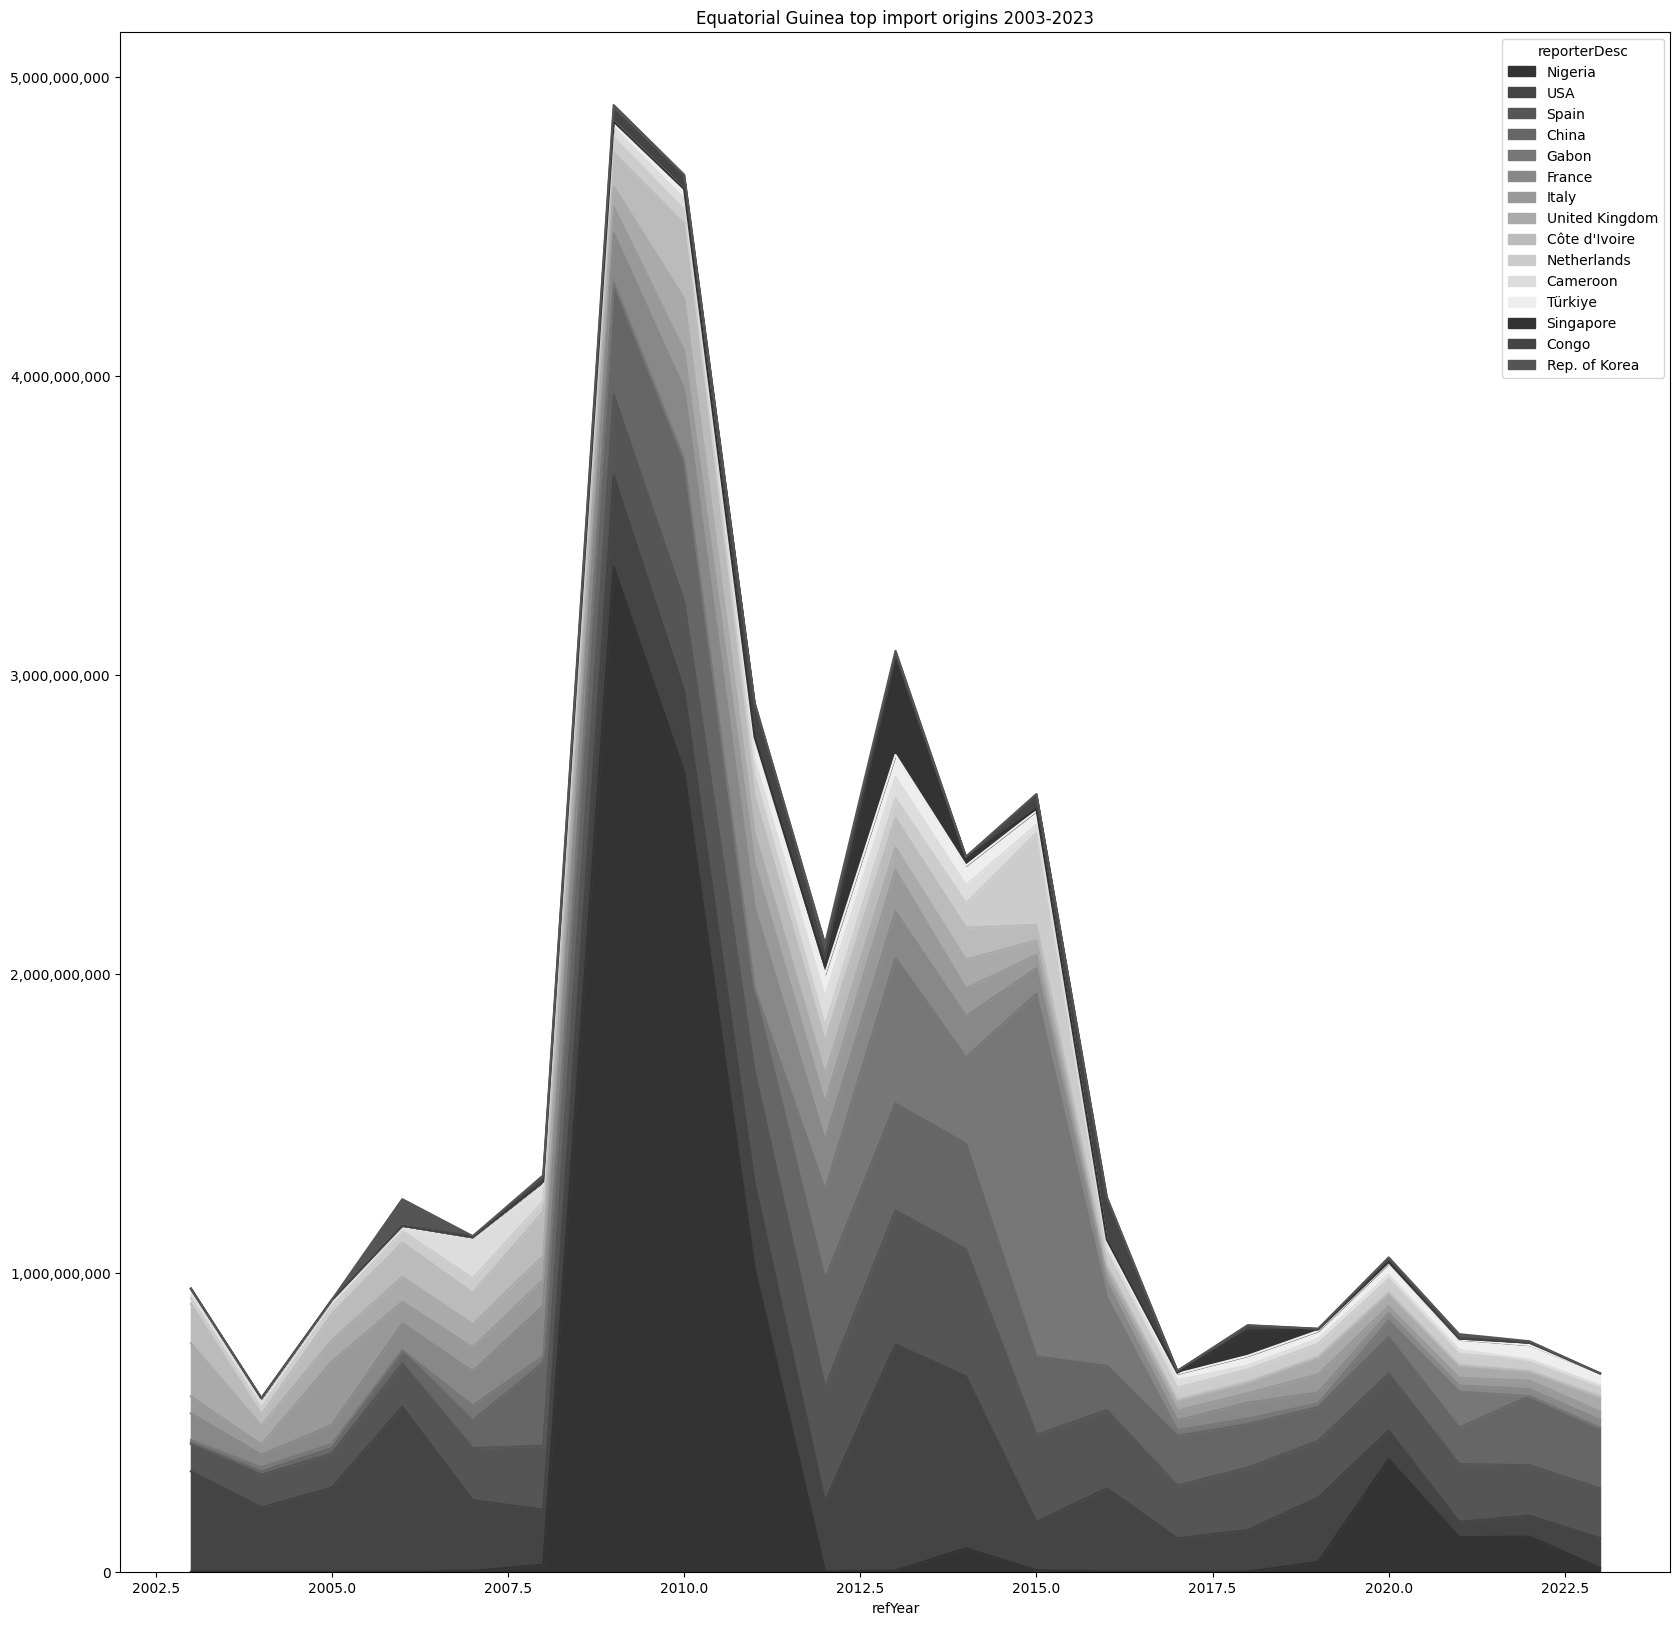

In [97]:
import matplotlib.pyplot as plt

title=f"{country_of_interest_name} top import origins {start_year}-{end_year}"
plotfile = f"reports/{country_of_interest_name}_3.1.4_import_partners_{start_year}-{end_year}.png"

# colors = ['red','lightsalmon','green','lightgreen','darkviolet','violet','blue','dodgerblue','orange','yellow','brown','black','grey','pink','cyan','magenta',]
# colors = ['crimson', 'darkorange', 'gold', 'limegreen', 'mediumseagreen', 'teal', 'deepskyblue', 'royalblue', 'indigo', 'mediumvioletred', 'hotpink', 'saddlebrown', 'grey', 'black', 'darkslategrey', 'darkkhaki']
colors = [ '#333333','#444444', '#555555', '#666666', '#777777', '#888888', '#999999', '#AAAAAA', '#BBBBBB', '#CCCCCC', '#DDDDDD', '#EEEEEE']
fig2 = values_only.plot.area(figsize=(20,20),title=title, color=colors)

for i, line in enumerate(fig2.get_lines()):
    n = i % len(colors)
    # print(i, line, colors[n])
    line.set_color(colors[n])

formatter = ticker.StrMethodFormatter('{x:,.0f}')
fig2.yaxis.set_major_formatter(formatter)

plt.savefig(plotfile)
plt.show()

In [98]:
plotfile

'reports/Equatorial Guinea_3.1.4_import_partners_2003-2023.png'

In [99]:
show_only_columns = [(l1, country) for l1,country in pivoted.columns.tolist() if country in top_import_partners]
list(show_only_columns)

[('partner_perc', 'Cameroon'),
 ('partner_perc', 'China'),
 ('partner_perc', 'Congo'),
 ('partner_perc', "Côte d'Ivoire"),
 ('partner_perc', 'France'),
 ('partner_perc', 'Gabon'),
 ('partner_perc', 'Italy'),
 ('partner_perc', 'Netherlands'),
 ('partner_perc', 'Nigeria'),
 ('partner_perc', 'Rep. of Korea'),
 ('partner_perc', 'Singapore'),
 ('partner_perc', 'Spain'),
 ('partner_perc', 'Türkiye'),
 ('partner_perc', 'USA'),
 ('partner_perc', 'United Kingdom'),
 ('primaryValue', 'Cameroon'),
 ('primaryValue', 'China'),
 ('primaryValue', 'Congo'),
 ('primaryValue', "Côte d'Ivoire"),
 ('primaryValue', 'France'),
 ('primaryValue', 'Gabon'),
 ('primaryValue', 'Italy'),
 ('primaryValue', 'Netherlands'),
 ('primaryValue', 'Nigeria'),
 ('primaryValue', 'Rep. of Korea'),
 ('primaryValue', 'Singapore'),
 ('primaryValue', 'Spain'),
 ('primaryValue', 'Türkiye'),
 ('primaryValue', 'USA'),
 ('primaryValue', 'United Kingdom')]

#### Export to Excel

Table with the top import origins for the period of interest

In [100]:
top_partners_file = f'reports/{country_of_interest_name}_3.1.1_top_import_partners.xlsx'
top_partners_cols_file = f'reports/{country_of_interest_name}_3.1.2_top_import_partners_cols.xlsx'
import_top_partners_file = f'reports/{country_of_interest_name}_3.1.3_import_top_{show_only_top}_partners_{start_year}-{end_year}.xlsx'

imports[cols].sort_values(['refYear','flowCode','partner_rank']).to_excel(top_partners_file)
pivoted.to_excel(top_partners_cols_file)
pivoted[show_only_columns].reset_index().to_excel(import_top_partners_file)

print(f"Top import partners file: {top_partners_file}")
print(f"Top import partners cols file: {top_partners_cols_file}")
print(f"Import top partners file: {import_top_partners_file}")

Top import partners file: reports/Equatorial Guinea_3.1.1_top_import_partners.xlsx
Top import partners cols file: reports/Equatorial Guinea_3.1.2_top_import_partners_cols.xlsx
Import top partners file: reports/Equatorial Guinea_3.1.3_import_top_5_partners_2003-2023.xlsx


### 3.2 Imports: products

#### Main imported products

In [101]:
import pandas as pd

# show 500 lines of dataframes
pd.set_option('display.max_rows', 500)

show_only_top=5
# years_of_interest = comtrade.year_range(2020, 2021)

print(country_of_interest_name, years_of_interest)


Equatorial Guinea 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023


Get the products imported by country of interest

In [141]:
# If symmetric_reporting is "True" we get the exports from
#    the reported imports of all the countries
# i.e. instead of asking Country of Interest for export data we ask the world
#    for import data from Country of Interest

symmetric_reporting = symmetric_reporting  # keep previous choice for consistency
if symmetric_reporting:
    reporterCode = None
    partnerCode = country_of_interest
    flowCode = 'X'
    reporter_column = 'partner'
    partner_column = 'reporter'
else:
    reporterCode = country_of_interest
    partnerCode = None
    flowCode = 'M'
    reporter_column = 'reporter'
    partner_column = 'partner'

symmetric_reporting

True

In [142]:
import comtradetools

clCode = 'HS'
cmdDetail = 'AG6'  # AG2 aggregate two digits, top level, AG4 detail 4 digits, ... World bank uses AG6 Equatorial Guinea uses AG4
df = comtradetools.getFinalData(
                        APIKEY,
                        reporterCode=reporterCode,
                        typeCode='C',  # commodities
                        freqCode='A',  # annual
                        flowCode=flowCode,
                        period=years_of_interest,
                        period_size=1,
                        partnerCode=partnerCode,
                        remove_world=False,
                        partner2Code=0,
                        clCode=clCode,
                        cmdCode=cmdDetail,
                        motCode=0,  # all means of transport
                        customsCode='C00',
                        includeDesc=True,
                        retry_if_empty=False,
                        cache=True
                        )
df.info()

INFO:root:Calling getFinalData for period 2003
INFO:root:Using cached results for period 2003
INFO:root:Calling getFinalData for period 2004
INFO:root:Using cached results for period 2004
INFO:root:Calling getFinalData for period 2005
INFO:root:Using cached results for period 2005
INFO:root:Calling getFinalData for period 2006
INFO:root:Using cached results for period 2006
INFO:root:Calling getFinalData for period 2007
INFO:root:Using cached results for period 2007
INFO:root:Calling getFinalData for period 2008
INFO:root:Using cached results for period 2008
INFO:root:Calling getFinalData for period 2009
INFO:root:Using cached results for period 2009
INFO:root:Calling getFinalData for period 2010
INFO:root:Using cached results for period 2010
INFO:root:Calling getFinalData for period 2011
INFO:root:Using cached results for period 2011
INFO:root:Calling getFinalData for period 2012
INFO:root:Using cached results for period 2012
INFO:root:Calling getFinalData for period 2013
INFO:root:Usi

/Users/jrc/develop/cipf-comtrade/comtradetools.py:658: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, temp], ignore_index=True)


In [143]:
print("Years available in the data:", list(df.refYear.unique()))

Years available in the data: [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [144]:
cols=['refYear','flowCode','cmdCode', 'cmdDesc','classificationCode','aggrLevel','isLeaf']

df[cols].head()

,refYear,flowCode,cmdCode,cmdDesc,classificationCode,aggrLevel,isLeaf
0,2003,X,620343,"Trousers, bib and brace overalls, breeches and shorts; men's or boys', of synthetic fibres (not knitted or crocheted)",H2,6,True
1,2003,X,842230,"Machinery; for filling, closing, sealing, capsuling or labelling bottles, cans, bags or other containers, machinery for aerating beverages",H2,6,True
2,2003,X,842230,"Machinery; for filling, closing, sealing, capsuling or labelling bottles, cans, bags or other containers, machinery for aerating beverages",H2,6,True
3,2003,X,220190,"Waters; other than mineral and aerated, (not containing added sugar or other sweetening matter nor flavoured), ice and snow",H2,6,True
4,2003,X,220190,"Waters; other than mineral and aerated, (not containing added sugar or other sweetening matter nor flavoured), ice and snow",H2,6,True


Agreggate by product, keep the top products imported each year

In [148]:
import pandas as pd
import comtradetools
# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5
imports = comtradetools.total_rank_perc(df,['refYear','flowCode','cmdCode'],'primaryValue','product',drop_duplicates=True)
imports = imports[imports['product_rank']<=show_only_top]
imports.info()

cols=['refYear','flowCode','product_rank','cmdCode', 'cmdDesc','product_sum','product_upper_perc','classificationCode','aggrLevel','isLeaf', 'product_upper_sum']
formats =  comtradetools.make_format(cols)

top_import_products_codes = imports['cmdCode'].unique()

print(f"Top products imported by {country_of_interest_name} in {years_of_interest}:\n {top_import_products_codes}")

print(f"Top products imported by {country_of_interest_name} in {years_of_interest}:\n {top_import_products_codes}")
for cmdCode in top_import_products_codes:
    print(f"   {cmdCode}: {comtradetools.HS_CODES.get(cmdCode,cmdCode)}")
imports[cols].sort_values(['refYear','flowCode','product_rank']).head(10).style.format(formats)


<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 565 to 228597
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   typeCode                  105 non-null    object 
 1   freqCode                  105 non-null    object 
 2   refPeriodId               105 non-null    int64  
 3   refYear                   105 non-null    int64  
 4   refMonth                  105 non-null    int64  
 5   period                    105 non-null    object 
 6   reporterCode              105 non-null    int64  
 7   reporterISO               105 non-null    object 
 8   reporterDesc              105 non-null    object 
 9   flowCode                  105 non-null    object 
 10  flowDesc                  105 non-null    object 
 11  partnerCode               105 non-null    int64  
 12  partnerISO                105 non-null    object 
 13  partnerDesc               105 non-null    object 
 14  partner2Co

,refYear,flowCode,product_rank,cmdCode,cmdDesc,product_sum,product_upper_perc,classificationCode,aggrLevel,isLeaf,product_upper_sum
1740,2003,X,1,890520,Floating or submersible drilling or production platforms,"$212,713,072",19.851%,H2,6,True,"$1,071,565,136"
565,2003,X,2,843143,Boring or sinking machinery; parts of the machinery of item no. 8430.41 or 8430.41,"$141,125,942",13.170%,H1,6,True,"$1,071,565,136"
2032,2003,X,3,847989,"Machines and mechanical appliances; n.e.s. in item no. 8479.8, having individual functions","$98,139,494",9.159%,H2,6,True,"$1,071,565,136"
3863,2003,X,4,830710,"Tubing; flexible, with or without fittings, of iron or steel","$46,231,955",4.314%,H2,6,True,"$1,071,565,136"
5137,2003,X,5,880240,"Aeroplanes and other aircraft; of an unladen weight exceeding 15,000kg","$40,000,000",3.733%,H2,6,True,"$1,071,565,136"
6005,2004,X,1,843143,Boring or sinking machinery; parts of the machinery of item no. 8430.41 or 8430.41,"$103,612,878",15.048%,H1,6,True,"$688,530,967"
6418,2004,X,2,271019,"Oils; petroleum oils and oils obtained from bituminous minerals, not crude; preparations n.e.c., containing by weight 70% or more of petroleum oils or oils obtained from bituminous minerals, (excluding waste oils), other than light oils and preparations","$38,983,063",5.662%,H2,6,True,"$688,530,967"
6126,2004,X,3,999999,Commodities not specified according to kind,"$20,395,101",2.962%,H1,6,True,"$688,530,967"
10731,2004,X,4,841182,"Turbines; gas-turbines (excluding turbo-jets and turbo-propellers), of a power exceeding 5000kW","$16,868,597",2.450%,H2,6,True,"$688,530,967"
5711,2004,X,5,271000,"Oils; petroleum oils and oils obtained from bituminous minerals, not crude; preparations n.e.s., containing by weight 70% or more of petroleum oils or oils obtained from bituminous minerals","$15,682,928",2.278%,H1,6,True,"$688,530,967"


### Caveat

For Angola results match https://trendeconomy.com/data/h2/Angola/TOTAL for AG2 and AG4 but not https://www.statista.com/statistics/1143152/value-of-imports-into-angola-by-category/  and close but not same as https://globaledge.msu.edu/countries/angola/tradestats

The imports match World Bank Wits data mostly, but in some years 
there seems to be a mismatch of HS Codes, with different descriptions in Wits
and values that sometimes match AG4 and not AG6 (2015,total is AG4:2710 not AG6:271012 )
and in same cases match the first 5 digits (2015: 73042 "Casings tubing...", 2021 10011, Durum Wheat)

Use the following cell to compute totals for codes with first 5 digit in common to compare with other sources

In [66]:
import pandas as pd

pd.set_option('display.max_colwidth', 200)
pd.options.display.float_format = '{:,.2f}'.format

code_prefix = '10011'
cols=['refYear','flowCode','product_rank','cmdCode','cmdDesc','primaryValue','product_perc']

# select rows and columns
selected_rows = df[(df['refYear']==2021) & (df['cmdCode'].str.startswith(code_prefix))][cols].sort_values(by=['primaryValue'],ascending=False).head(50)

# add total of primaryValue column
total = selected_rows['primaryValue'].sum()
selected_rows.loc['total'] = pd.Series({'primaryValue': total})

# display selected rows
selected_rows


,refYear,flowCode,product_rank,cmdCode,cmdDesc,primaryValue,product_perc
total,NaN,NaN,NaN,NaN,NaN,0.00,NaN


In [146]:
print("Years available in the data:", list(imports.refYear.unique()))

Years available in the data: [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


#### Export to Excel

In [147]:
filename = f'reports/{country_of_interest_name}_3.2_imports_products_{clCode}-{cmdDetail}-{imports["refYear"].min()}-{imports["refYear"].max()}.xlsx'
print("Exporting to ",filename)
imports[cols].sort_values(['refYear','flowCode','product_rank']).to_excel(filename,index=False)

Exporting to  reports/Equatorial Guinea_3.2_imports_products_HS-AG6-2003-2023.xlsx


### 3.3 Import partners / product analysis

Which are the partners selling the top imports by country of interest

In [149]:
# If symmetric_reporting is "True" we get the exports from
#    the reported imports of all the countries
# i.e. instead of asking Country of Interest for export data we ask the world
#    for import data from Country of Interest

symmetric_reporting = symmetric_reporting  # keep previous choice

if symmetric_reporting:
    reporterCode = None
    partnerCode = country_of_interest
    flowCode = 'X'
    reporter_column = 'partner'
    partner_column = 'reporter'
else:
    reporterCode = country_of_interest
    partnerCode = None
    flowCode = 'M'
    reporter_column = 'reporter'
    partner_column = 'partner'

In [150]:
import warnings
warnings.filterwarnings('default')

clCode = 'HS'
cmdDetail = 'AG6'  # not all countries report at higher detail

df = comtradetools.getFinalData(
                        APIKEY,
                        reporterCode=reporterCode,
                        typeCode='C',  # commodities
                        freqCode='A',  # annual
                        flowCode=flowCode,
                        period=years_of_interest,
                        period_size=1, # lots of data, better segment
                        partnerCode=partnerCode,
                        remove_world=False,
                        partner2Code=0,
                        clCode=clCode,
                        cmdCode=cmdDetail,
                        motCode=0,  # all means of transport
                        customsCode='C00',
                        includeDesc=True,
                        retry_if_empty=False,
                        cache=True
                        )
df.info()

INFO:root:Calling getFinalData for period 2003
INFO:root:Using cached results for period 2003
INFO:root:Calling getFinalData for period 2004
INFO:root:Using cached results for period 2004
INFO:root:Calling getFinalData for period 2005
INFO:root:Using cached results for period 2005
INFO:root:Calling getFinalData for period 2006
INFO:root:Using cached results for period 2006
INFO:root:Calling getFinalData for period 2007
INFO:root:Using cached results for period 2007
INFO:root:Calling getFinalData for period 2008
INFO:root:Using cached results for period 2008
INFO:root:Calling getFinalData for period 2009
INFO:root:Using cached results for period 2009
INFO:root:Calling getFinalData for period 2010
INFO:root:Using cached results for period 2010
INFO:root:Calling getFinalData for period 2011
INFO:root:Using cached results for period 2011
INFO:root:Calling getFinalData for period 2012
INFO:root:Using cached results for period 2012
INFO:root:Calling getFinalData for period 2013
INFO:root:Usi

/Users/jrc/develop/cipf-comtrade/comtradetools.py:658: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, temp], ignore_index=True)


In [151]:
cols2=['refYear','flowCode','reporterDesc','partnerDesc','primaryValue','cmdCode','cmdDesc']
df[cols2].sample(10)

,refYear,flowCode,reporterDesc,partnerDesc,primaryValue,cmdCode,cmdDesc
15495,2005,X,South Africa,Equatorial Guinea,"20,230.00",382200,"Reagents; diagnostic or laboratory reagents on a backing and prepared diagnostic or laboratory reagents whether or not on a backing, other than those of heading no. 3002 or 3006; certified referen..."
177215,2018,X,Portugal,Equatorial Guinea,389.99,850819,"Vacuum cleaners, with self-contained electric motor, n.e.c. in item no. 8508.1"
46123,2008,X,Brazil,Equatorial Guinea,"108,232.00",940320,"Furniture; metal, other than for office use"
201896,2020,X,Spain,Equatorial Guinea,"1,463.76",850490,"Electrical transformers, static converters and inductors; parts thereof"
155402,2016,X,South Africa,Equatorial Guinea,152.73,481690,"Paper; carbon paper and other copying or transfer papers (other than those of heading no. 4809), n.e.c. in item no. 4816.20"
72984,2011,X,Spain,Equatorial Guinea,"1,250.34",380894,"Disinfectants and similar products; not containing substances of 3808.50; in forms, packings or articles for retail sale"
55008,2009,X,Spain,Equatorial Guinea,"1,226.12",420329,"Clothing accessories; gloves, mittens and mitts, n.e.c. in heading no. 4203, of leather or composition leather, not specially designed for use in sports"
230487,2023,X,Netherlands,Equatorial Guinea,"1,132.09",200190,"Vegetable preparations; vegetables, fruit, nuts and other edible parts of plants, prepared or preserved by vinegar or acetic acid (excluding cucumbers and gherkins)"
37762,2008,X,Brazil,Equatorial Guinea,"10,395.00",220290,"Non-alcoholic beverages; n.e.c. in item no. 2202.10, not including fruit or vegetable juices of heading no. 2009"
135032,2015,X,China,Equatorial Guinea,"10,060.00",831190,"Wires, rods, tubes, plates, electrodes of base metal or metal carbides; of a kind used for soldering, brazing, welding; wires and rods for metal spraying; n.e.c. in item no. 8311"


In [152]:
df.refYear.unique()

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

Aggregate by partner and keep the main ones

In [153]:
import pandas as pd
import comtradetools
import warnings

# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5   # change to have more top partners

print(f"Top products imported by {country_of_interest_name} in {years_of_interest}:\n {top_import_products_codes}")
for cmdCode in top_import_products_codes:
    print(f"   {cmdCode}: {comtradetools.HS_CODES.get(cmdCode,cmdCode)}")

print(f"Top import partners ({len(top_import_partners)}): {top_import_partners}")
prefix='cmd_partner'
# remove world
if 0 in df[f'{partner_column}Code'].unique():
    warnings.warn("Removing world from data")
    df = df[df[f'{partner_column}Code']!=0]

products_and_partners = comtradetools.total_rank_perc(df,['refYear','flowCode','cmdCode',f'{partner_column}Code'],'primaryValue',prefix,drop_duplicates=True)
cols=['refYear','flowCode','cmdDesc','cmdCode',f'{partner_column}Desc',f'{prefix}_rank',f'{prefix}_sum',f'{prefix}_perc',f'{prefix}_upper_sum']
formats=comtradetools.make_format(cols)

products_and_partners=products_and_partners[(products_and_partners['cmdCode'].isin(top_import_products_codes)
                        & (products_and_partners[f'{prefix}_rank']<=show_only_top))]
print(f"Data available for years {products_and_partners.refYear.unique()}")


Top products imported by Equatorial Guinea in 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023:
 ['843143' '890520' '847989' '830710' '880240' '271000' '999999' '271019'
 '841182' '841480' '843049' '841199' '890590' '270900' '721420' '854449'
 '880230' '730890' '890190' '220300' '271011' '020714' '151190' '848180'
 '730511' '890800' '731100' '890690' '690490' '220210']
   843143: Boring or sinking machinery; parts for boring or sinking machinery of subheading 8430.41 or 8430.49
   890520: Floating or submersible drilling or production platforms
   847989: Machines and mechanical appliances; having individual functions, n.e.c. or included in this chapter
   830710: Tubing; flexible, with or without fittings, of iron or steel
   880240: Aeroplanes and other aircraft, except unmanned; of an unladen weight exceeding 15,000kg
   271000: 271000
   999999: Commodities not specified according to kind
   271019: Petroleum oils and oils fro

### Partners for main import products

In [154]:
products_and_partners[cols].sort_values(['refYear','flowCode',f'{prefix}_upper_sum',f'{prefix}_rank'],
                                        ascending=[True,True,False,True])\
                                            .head(30).style.format(formats) #.hide(axis='index')

,refYear,flowCode,cmdDesc,cmdCode,reporterDesc,cmd_partner_rank,cmd_partner_sum,cmd_partner_perc,cmd_partner_upper_sum
1740,2003,X,Floating or submersible drilling or production platforms,890520,Côte d'Ivoire,1,"$109,011,656",51.248%,"$212,713,072"
1742,2003,X,Floating or submersible drilling or production platforms,890520,United Kingdom,2,"$103,701,416",48.752%,"$212,713,072"
5541,2003,X,Boring or sinking machinery; parts of the machinery of item no. 8430.41 or 8430.41,843143,USA,1,"$125,444,554",88.888%,"$141,125,942"
5534,2003,X,Boring or sinking machinery; parts of the machinery of item no. 8430.41 or 8430.41,843143,United Kingdom,2,"$11,918,052",8.445%,"$141,125,942"
5535,2003,X,Boring or sinking machinery; parts of the machinery of item no. 8430.41 or 8430.41,843143,Netherlands,3,"$1,578,917",1.119%,"$141,125,942"
5536,2003,X,Boring or sinking machinery; parts of the machinery of item no. 8430.41 or 8430.41,843143,Norway,4,"$770,118",0.546%,"$141,125,942"
5546,2003,X,Boring or sinking machinery; parts of the machinery of item no. 8430.41 or 8430.41,843143,Canada,5,"$457,626",0.324%,"$141,125,942"
2034,2003,X,"Machines and mechanical appliances; n.e.s. in item no. 8479.8, having individual functions",847989,Norway,1,"$51,034,945",52.002%,"$98,139,494"
2039,2003,X,"Machines and mechanical appliances; n.e.s. in item no. 8479.8, having individual functions",847989,USA,2,"$45,856,384",46.726%,"$98,139,494"
2032,2003,X,"Machines and mechanical appliances; n.e.s. in item no. 8479.8, having individual functions",847989,United Kingdom,3,"$534,095",0.544%,"$98,139,494"


In [155]:
filename = f'reports/{country_of_interest_name}_3.3_imports_products_partners_{clCode}-{cmdDetail}-{products_and_partners["refYear"].min()}-{products_and_partners["refYear"].max()}.xlsx'
print("Exporting to ",filename)
products_and_partners[cols].sort_values(['refYear','flowCode',f'{prefix}_upper_sum',f'{prefix}_rank'],
                                        ascending=[True,True,False,True]).to_excel(filename, index=False)

Exporting to  reports/Equatorial Guinea_3.3_imports_products_partners_HS-AG6-2003-2023.xlsx


### 3.4 Main partners and main products imported by country of interest

Detail of the main products by import partner.

Allows to analyse the mix of products of the main suppliers from this country.



In [156]:
top_import_partners

array(['France', "Côte d'Ivoire", 'Spain', 'United Kingdom', 'USA',
       'Italy', 'Rep. of Korea', 'Cameroon', 'China', 'Nigeria', 'Gabon',
       'Singapore', 'Netherlands', 'Congo', 'Türkiye'], dtype=object)

In [157]:
import comtradetools

show_only_top = 5  # for suppliers with wide range of products e.g PT->AO increase

print(f"Top import partners ({len(top_import_partners)}): {top_import_partners}")
prefix='partner_cmd'
suppliers_and_products = comtradetools.total_rank_perc(df,['refYear','flowCode',f'{partner_column}Code','cmdCode'],'primaryValue',prefix,drop_duplicates=False)

cols=['refYear','flowCode',f'{partner_column}Desc',f'{prefix}_rank','cmdCode','cmdDesc',f'{prefix}_sum',f'{prefix}_perc',f'{prefix}_upper_sum']
formats = comtradetools.make_format(cols)
suppliers_and_products=suppliers_and_products[(suppliers_and_products[f'{partner_column}Desc'].isin(top_import_partners)
                       & (suppliers_and_products[f'{prefix}_rank']<=show_only_top))]

print("First rows")
suppliers_and_products[suppliers_and_products[f'{prefix}_rank']<=show_only_top][cols].sort_values(
    ['refYear','flowCode','partner_cmd_upper_sum',f'{prefix}_sum',f'{prefix}_rank'],
    ascending=[True,True,False,False,False]).head(10).style.format(formats).hide(axis='index')

Top import partners (15): ['France' "Côte d'Ivoire" 'Spain' 'United Kingdom' 'USA' 'Italy'
 'Rep. of Korea' 'Cameroon' 'China' 'Nigeria' 'Gabon' 'Singapore'
 'Netherlands' 'Congo' 'Türkiye']
First rows


refYear,flowCode,reporterDesc,partner_cmd_rank,cmdCode,cmdDesc,partner_cmd_sum,partner_cmd_perc,partner_cmd_upper_sum
2003,X,USA,1,843143,Boring or sinking machinery; parts of the machinery of item no. 8430.41 or 8430.41,"$125,444,554",37.367%,"$335,713,079"
2003,X,USA,2,847989,"Machines and mechanical appliances; n.e.s. in item no. 8479.8, having individual functions","$45,856,384",13.659%,"$335,713,079"
2003,X,USA,3,880240,"Aeroplanes and other aircraft; of an unladen weight exceeding 15,000kg","$40,000,000",11.915%,"$335,713,079"
2003,X,USA,4,730429,"Iron or steel; casing and tubing, of a kind used in drilling for oil or gas","$8,165,677",2.432%,"$335,713,079"
2003,X,USA,5,940600,Buildings; prefabricated,"$7,881,963",2.348%,"$335,713,079"
2003,X,United Kingdom,1,890520,Floating or submersible drilling or production platforms,"$103,701,416",58.308%,"$177,850,340"
2003,X,United Kingdom,2,843143,Boring or sinking machinery; parts of the machinery of item no. 8430.41 or 8430.41,"$11,918,052",6.701%,"$177,850,340"
2003,X,United Kingdom,3,940600,Buildings; prefabricated,"$7,903,243",4.444%,"$177,850,340"
2003,X,United Kingdom,4,848180,"Taps, cocks, valves and similar appliances; for pipes, boiler shells, tanks, vats or the like, including thermostatically controlled valves","$4,832,544",2.717%,"$177,850,340"
2003,X,United Kingdom,5,391733,"Plastics; tubes, pipes and hoses thereof, other than those of item no. 3917.31, not reinforced or otherwise combined with other materials, with fittings","$4,161,576",2.340%,"$177,850,340"


Last rows

In [159]:

suppliers_and_products[suppliers_and_products[f'{prefix}_rank']<=show_only_top][cols].sort_values(
    ['refYear','flowCode','partner_cmd_upper_sum',f'{prefix}_sum',f'{prefix}_rank'],
    ascending=[True,True,False,False,False]).tail(10).style.format(formats).hide(axis='index')

refYear,flowCode,reporterDesc,partner_cmd_rank,cmdCode,cmdDesc,partner_cmd_sum,partner_cmd_perc,partner_cmd_upper_sum
2023,X,France,1,843139,"Machinery; parts of the machinery of heading no. 8428, (other than lifts, skip hoists or escalators)","$2,740,679",10.224%,"$26,806,197"
2023,X,France,2,271019,"Petroleum oils and oils from bituminous minerals, not containing biodiesel, not crude, not waste oils; preparations n.e.c, containing by weight 70% or more of petroleum oils or oils from bituminous minerals; not light oils and preparations","$2,021,419",7.541%,"$26,806,197"
2023,X,France,3,841199,Turbines; parts of gas turbines (excluding turbo-jets and turbo-propellers),"$1,135,021",4.234%,"$26,806,197"
2023,X,France,4,020727,"Meat and edible offal; of turkeys, cuts and offal, frozen","$1,070,207",3.992%,"$26,806,197"
2023,X,France,5,210690,Food preparations; n.e.c. in item no. 2106.10,"$798,790",2.980%,"$26,806,197"
2023,X,Nigeria,1,890800,Vessels and other floating structures; for breaking up,"$10,057,099",78.777%,"$12,766,533"
2023,X,Nigeria,2,730490,"Iron or steel (excluding cast iron); seamless, tubes, pipes and hollow profiles, seamless, n.e.c. in heading no. 7304","$857,073",6.713%,"$12,766,533"
2023,X,Nigeria,3,730424,"Steel, stainless; seamless, casing and tubing, of a kind used in drilling for oil or gas","$852,472",6.677%,"$12,766,533"
2023,X,Nigeria,4,732690,Iron or steel; articles n.e.c. in heading 7326,"$669,069",5.241%,"$12,766,533"
2023,X,Nigeria,5,961900,"Sanitary towels (pads) and tampons, napkins (diapers), napkin liners and similar articles, of any material","$149,999",1.175%,"$12,766,533"


#### Export to Excel

In [160]:
filename = f'reports/{country_of_interest_name}_3.4_imports_partners_products_{clCode}-{cmdDetail}-{products_and_partners["refYear"].min()}-{products_and_partners["refYear"].max()}.xlsx'

suppliers_and_products[suppliers_and_products[f'{prefix}_rank']<=show_only_top][cols].sort_values(
    ['refYear','flowCode','partner_cmd_upper_sum',f'{prefix}_sum',f'{prefix}_rank'],
    ascending=[True,True,False,False,False]).to_excel(filename, index=False)

print("Exporting to ",filename)

Exporting to  reports/Equatorial Guinea_3.4_imports_partners_products_HS-AG6-2003-2023.xlsx


### 3.5 Get the alternative clients for country of interest suppliers

For each year, supplier, imported commodity, fetch all the 
exports of the commodity by the supplier to other countries, and
compute the ranking of country of interest among the clients
of partner for that commodity.

Country of interest: Angola, in 2022 Argentina was #1 supplier of Angola for commodity
code 100119 "Cereals; wheat and meslin, durum wheat, other than seed"; fetch all the clients of Argentina for 100119 and compute the ranking of Angola.

First step is to get the combos os partner and commodity.



In [161]:
top_import_products_codes

array(['843143', '890520', '847989', '830710', '880240', '271000',
       '999999', '271019', '841182', '841480', '843049', '841199',
       '890590', '270900', '721420', '854449', '880230', '730890',
       '890190', '220300', '271011', '020714', '151190', '848180',
       '730511', '890800', '731100', '890690', '690490', '220210'],
      dtype=object)

In [162]:
top_import_partners_codes, partner_column

(array([251, 384, 724, 826, 842, 380, 410, 120, 156, 566, 266, 702, 528,
        178, 792]),
 'reporter')

In [167]:
suppliers_and_products[[f"{partner_column}Desc",f"{partner_column}Code",'cmdCode']].sample(10)

,reporterDesc,reporterCode,cmdCode
225132,Türkiye,792,721420
193076,Türkiye,792,721420
22055,Netherlands,528,271019
6933,Côte d'Ivoire,384,271011
167534,Spain,724,220820
146599,United Kingdom,826,841391
73107,Nigeria,566,390799
164623,Italy,380,940540
88437,France,251,730890
208791,Italy,380,841199


In [168]:
combos_of_interest = suppliers_and_products[(suppliers_and_products['cmdCode'].isin(top_import_products_codes)
                & (suppliers_and_products[f'{partner_column}Code'].isin(top_import_partners_codes)))][[f'{partner_column}Code','cmdCode']].drop_duplicates()
combos_of_interest = [tuple(x) for x in combos_of_interest.values]
len(combos_of_interest)

130

In [169]:
# create lists of commodities codes and country codes to query comtrade
cmdCode_list = [cmdCode for (countryCode,cmdCode) in combos_of_interest]
cmdCode_list = list(set(cmdCode_list))
countryCode_list = [countryCode for (countryCode,cmdCode) in combos_of_interest]
countryCode_list = list(set(countryCode_list))
cmdCodeCSV = ','.join(cmdCode_list)
countryCodeCSV = ','.join(map(str,countryCode_list))

Get the all clients of suppliers for the products imported by country of interest

In [176]:
print("Years of interest: ", years_of_interest)
print("countryCodeCSV: ", countryCodeCSV)
print("cmdCodeCSV: ", cmdCodeCSV)

df = comtradetools.getFinalData(APIKEY,
                                typeCode='C',  # commodities
                                freqCode='A',  # annual
                                flowCode='X',
                                reporterCode=countryCodeCSV,
                                partnerCode=None,
                                remove_world=True,
                                partner2Code=0,
                                period=years_of_interest,
                                period_size=1,
                                clCode=clCode,
                                cmdCode=cmdCodeCSV,  # Top level product types
                                motCode=0,  # all means of transport
                                customsCode='C00',
                                includeDesc=True,
                                retry_if_empty=False,
                                cache=True,

                                )

Years of interest:  2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
countryCodeCSV:  384,266,842,410,528,156,792,178,724,566,120,826,251,380,702
cmdCodeCSV:  890190,271011,721420,890520,843049,841480,848180,151190,731100,220300,841182,690490,854449,880240,220210,270900,830710,271000,271019,730890,847989,730511,841199,890690,020714,999999,843143,890800,880230,890590
INFO:root:Calling getFinalData for period 2003


Countries also buying top imports of country of interest from the same suppliers

In [172]:
list(df.reporterDesc.unique()), list(df.partnerDesc.unique())


(['Netherlands',
  'Spain',
  'Germany',
  'France',
  'USA',
  'Italy',
  'United Kingdom',
  'South Africa',
  'China',
  'Lebanon',
  'Türkiye',
  'Canada',
  'Cameroon',
  "Côte d'Ivoire",
  'Gabon',
  'China, Hong Kong SAR',
  'Denmark',
  'Russian Federation',
  'Brazil',
  'Portugal',
  'Kazakhstan',
  'Morocco',
  'Argentina',
  'Belgium',
  'Switzerland',
  'Japan',
  'Luxembourg',
  'Pakistan',
  'Norway',
  'India',
  'Slovakia',
  'Ecuador',
  'Senegal',
  'Rep. of Korea',
  'Algeria',
  'Venezuela',
  'Tunisia',
  'Uruguay',
  'New Zealand',
  'Ukraine',
  'Bangladesh',
  'Czechia',
  'Sweden',
  'Kenya',
  'Greece',
  'Thailand',
  'Cyprus',
  'Austria',
  'Azerbaijan',
  'Ghana',
  'Ireland',
  'Israel',
  'Paraguay',
  'Benin',
  'Mexico',
  'Malaysia',
  'Other Asia, nes',
  'Indonesia',
  'Trinidad and Tobago',
  'Australia',
  'Peru',
  'Colombia',
  'Mali',
  'Zimbabwe',
  'Finland',
  'Viet Nam',
  'Togo',
  'Dominican Rep.',
  'Philippines',
  'Hungary',
  'Guatem

### Ranking of country of interest in the costumers of main suppliers
Allows assessment of the importance of country of interest for the partners
that are selling its main imports.

It allows for restricting rank, avoiding irrelevant matchess

For each supplier show the top costumers of the products bought by country of interest. 

If country of interest is not in the top five constumers, show position anyway if it is a supplier in the given year 

In [174]:
import pandas as pd
import comtradetools

#  set max rows to 500
pd.set_option('display.max_rows', 1500)


other_costumers = comtradetools.total_rank_perc(
                                        df,
                                        groupby=['refYear','flowCode','reporterCode','cmdCode','partnerCode'],
                                        col='primaryValue',
                                        prefix='cmd_partner',
                                        )

other_costumers = other_costumers[other_costumers[['reporterCode','cmdCode']].apply(tuple,axis=1).isin(combos_of_interest)]
cols=['reporterDesc','cmdCode','cmdDesc','refYear','partnerDesc','cmd_partner_rank','primaryValue','cmd_partner_perc','cmd_partner_upper_sum']
formats =  comtradetools.make_format(cols)

other_costumers[(other_costumers['partnerCode'] == country_of_interest)
                | (other_costumers['cmd_partner_rank']<=show_only_top)
                ][cols].sort_values(by=['reporterDesc','cmdCode','refYear','cmd_partner_rank']).head(20).style.format(formats).hide(axis="index")

reporterDesc,cmdCode,cmdDesc,refYear,partnerDesc,cmd_partner_rank,primaryValue,cmd_partner_perc,cmd_partner_upper_sum
Cameroon,151190,"Vegetable oils; palm oil and its fractions, other than crude, whether or not refined, but not chemically modified",2004,Equatorial Guinea,1,"$1,102,203",100.000%,"$1,102,203"
Cameroon,151190,"Vegetable oils; palm oil and its fractions, other than crude, whether or not refined, but not chemically modified",2005,Equatorial Guinea,1,"$112,304",100.000%,"$112,304"
Cameroon,151190,"Vegetable oils; palm oil and its fractions, other than crude, whether or not refined, but not chemically modified",2007,Equatorial Guinea,1,"$18,453",100.000%,"$18,453"
Cameroon,151190,"Vegetable oils; palm oil and its fractions, other than crude, whether or not refined, but not chemically modified",2009,Equatorial Guinea,1,"$1,838",100.000%,"$1,838"
Cameroon,151190,"Vegetable oils; palm oil and its fractions, other than crude, whether or not refined, but not chemically modified",2010,Equatorial Guinea,1,"$88,179",100.000%,"$88,179"
Cameroon,151190,"Vegetable oils; palm oil and its fractions, other than crude, whether or not refined, but not chemically modified",2013,Equatorial Guinea,1,"$1,013",100.000%,"$1,013"
Cameroon,220300,Beer; made from malt,2003,Equatorial Guinea,1,"$5,566,489",100.000%,"$5,566,489"
Cameroon,220300,Beer; made from malt,2004,Equatorial Guinea,1,"$2,187,053",100.000%,"$2,187,053"
Cameroon,220300,Beer; made from malt,2005,Equatorial Guinea,1,"$272,276",100.000%,"$272,276"
Cameroon,220300,Beer; made from malt,2007,Equatorial Guinea,1,"$6,155,466",100.000%,"$6,155,466"


In [175]:
ignore_if_rank_is_higher = 25

relevant_for_partner_exports=other_costumers[
    (other_costumers['partnerCode'] == country_of_interest) &
    (other_costumers['cmd_partner_rank'] < ignore_if_rank_is_higher)
][cols].sort_values(by=['reporterDesc','cmdCode','refYear','cmd_partner_rank'])
relevant_for_partner_exports.head(10).style.format(formats).hide(axis='index')

reporterDesc,cmdCode,cmdDesc,refYear,partnerDesc,cmd_partner_rank,primaryValue,cmd_partner_perc,cmd_partner_upper_sum
Cameroon,151190,"Vegetable oils; palm oil and its fractions, other than crude, whether or not refined, but not chemically modified",2004,Equatorial Guinea,1,"$1,102,203",100.000%,"$1,102,203"
Cameroon,151190,"Vegetable oils; palm oil and its fractions, other than crude, whether or not refined, but not chemically modified",2005,Equatorial Guinea,1,"$112,304",100.000%,"$112,304"
Cameroon,151190,"Vegetable oils; palm oil and its fractions, other than crude, whether or not refined, but not chemically modified",2007,Equatorial Guinea,1,"$18,453",100.000%,"$18,453"
Cameroon,151190,"Vegetable oils; palm oil and its fractions, other than crude, whether or not refined, but not chemically modified",2009,Equatorial Guinea,1,"$1,838",100.000%,"$1,838"
Cameroon,151190,"Vegetable oils; palm oil and its fractions, other than crude, whether or not refined, but not chemically modified",2010,Equatorial Guinea,1,"$88,179",100.000%,"$88,179"
Cameroon,151190,"Vegetable oils; palm oil and its fractions, other than crude, whether or not refined, but not chemically modified",2013,Equatorial Guinea,1,"$1,013",100.000%,"$1,013"
Cameroon,220300,Beer; made from malt,2003,Equatorial Guinea,1,"$5,566,489",100.000%,"$5,566,489"
Cameroon,220300,Beer; made from malt,2004,Equatorial Guinea,1,"$2,187,053",100.000%,"$2,187,053"
Cameroon,220300,Beer; made from malt,2005,Equatorial Guinea,1,"$272,276",100.000%,"$272,276"
Cameroon,220300,Beer; made from malt,2007,Equatorial Guinea,1,"$6,155,466",100.000%,"$6,155,466"


#### Export to Excel


In [87]:
filename = filename = f'reports/{country_of_interest_name}_3.5.1_import_partners_alternative.xlsx'

other_costumers[(other_costumers['partnerCode'] == country_of_interest)
                | (other_costumers['cmd_partner_rank']<=show_only_top)
                ][cols].sort_values(by=['reporterDesc','cmdCode','refYear','cmd_partner_rank']).to_excel(filename, index=False)
print("Exporting to ",filename)

Exporting to  reports/Equatorial Guinea_3.5.1_import_partners_alternative.xlsx


In [88]:
filename = f'reports/{country_of_interest_name}_3.5.2_import_partners_alternative_relevant.xlsx'

relevant_for_partner_exports.to_excel(filename, index=False)
print("Exporting to ",filename)

Exporting to  reports/Equatorial Guinea_3.5.2_import_partners_alternative_relevant.xlsx


In [89]:
from datetime import datetime

current_datetime = datetime.now()
print(f"End run for {country_of_interest_name}:", current_datetime)

End run for Equatorial Guinea: 2024-06-22 01:54:08.924499


In [463]:
"Done"

'Done'